<a href="https://colab.research.google.com/github/AnuAsai22/Lead_Scoring_CaseStudy/blob/main/Lead_Scoring_AnuFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
# Import Warnings

import warnings
warnings.filterwarnings('ignore')

In [394]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [395]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/lead_scoring')

**Step-1: CREATING DATA FRAME**

In [396]:
ls=pd.read_csv('Leads.csv')

In [397]:
ls.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [398]:
ls.shape

(9240, 37)

In [399]:
ls.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [400]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [401]:
ls[ls.duplicated()==True]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

There are no duplicates in the dataframe

**Step 2: DATA PREPARATION AND MISSING VALUES HANDLING**


In [402]:
ls.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Dropping Prospect ID and Lead Number because they are unique and we already have index column to do the same

In [403]:
ls.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)
ls.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                        No   
1             Email Opened   India  ...                        No   
2             Email Opened   India  ...                        No   
3              Unreachable   India  ...                        No   
4        Converted to Lead   India  ...                        No   

     Lead Profile    City Asymmetrique Activity Index  \
0          Select  Select                   02.Medium   
1          Select  Select                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3          Select  Mumbai                   02.Medium   
4          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   
2                       20.0                                       No   
3                       17.0                                       No   
4                       18.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 35 columns]

Here we can find 'select' as values in many columns which are left without filling by the customers. So replacing those values with 'Nan'

In [404]:
ls.replace("Select",np.NaN,inplace=True)
ls.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                        No   
1             Email Opened   India  ...                        No   
2             Email Opened   India  ...                        No   
3              Unreachable   India  ...                        No   
4        Converted to Lead   India  ...                        No   

     Lead Profile    City Asymmetrique Activity Index  \
0             NaN     NaN                   02.Medium   
1             NaN     NaN                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3             NaN  Mumbai                   02.Medium   
4             NaN  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   
2                       20.0                                       No   
3                       17.0                                       No   
4                       18.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 35 columns]

In [405]:
ls.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [406]:
ls.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)
ls.head()

#Removed few columns having only one unique values as it not affect the analysis

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ...                                 Tags  \
0  Page Visited on Website     NaN  ...          Interested in other courses   
1             Email Opened   India  ...                              Ringing   
2             Email Opened   India  ...  Will revert after reading the email   
3              Unreachable   India  ...                              Ringing   
4        Converted to Lead   India  ...  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance             NaN     NaN                   02.Medium   
1               NaN             NaN     NaN                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure             NaN  Mumbai                   02.Medium   
4          Might be             NaN  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                       15.0                                     No   
1                       15.0                                     No   
2                       20.0                                    Yes   
3                       17.0                                     No   
4                       18.0                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  

[5 rows x 30 columns]

In [407]:
#Null values analysis
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [408]:
#dropping all the columns having more than 50% missing values

cols=ls.columns
for i in cols:
    if((100*(ls[i].isnull().sum()/len(ls.index)))>=50):
        ls.drop(i,1,inplace=True)

In [409]:
ls.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   
2             Email Opened   India  ...                    No   
3              Unreachable   India  ...                    No   
4        Converted to Lead   India  ...                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses     NaN   
1                      No                              Ringing     NaN   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [410]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [411]:
##Checking the columns with binary category (YES/NO) values

bc=["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]
for col in bc:
    print(ls[col].value_counts(normalize=True)*100)
    print("\n\n")

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64



No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64



No     99.848485
Yes     0.151515
Name: Search, dtype: float64



No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64



No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64



No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64



No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64



No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64



No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64





Dropping some of the above listed binary valued columns with data imbalance as it is not useful for analysis

In [412]:
ib_cols = ["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]
ls.drop(ib_cols,axis=1,inplace=True)
ls.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    City Asymmetrique Activity Index  \
0          Interested in other courses     NaN                   02.Medium   
1                              Ringing     NaN                   02.Medium   
2  Will revert after reading the email  Mumbai                   02.Medium   
3                              Ringing  Mumbai                   02.Medium   
4  Will revert after reading the email  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High                         13.0   
4                    01.High                         15.0   

   Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                        15.0                                     No   
1                        15.0                                     No   
2                        20.0                                    Yes   
3                        17.0                                     No   
4                        18.0                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [413]:
ls.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [414]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [415]:
ls.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In 'Tags' column all less frequency options are grouped to a single option and missing values are grouped as 'Not Provided'. It can be dropped later if it is not important in future.

In [416]:
ls['Tags']=ls['Tags'].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given","opp hangup","number not provided","in touch with EINS","Lost to Others","Still Thinking","Want to take admission but has financial problems","Interested in Next batch","In confusion whether part time or DLP","Lateral student","University not recognized","Shall take in the next coming month","Recognition issue (DEC approval)"],"OtherTags")
ls['Tags']=ls['Tags'].fillna('Not Provided') 
ls.Tags.value_counts()

Not Provided                           3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
OtherTags                               302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [417]:
ls['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In 'Last Notable Activity' Column grouped some less frequency actions to single option like we did for 'tags'

In [418]:
ls['Last Notable Activity']=ls['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other Activities')
ls['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activities            160
Name: Last Notable Activity, dtype: int64

In [419]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [420]:
act_col=["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]
for col in act_col:
    print(ls[col].value_counts(normalize=True)*100)
    print("\n")

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64


02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64


14.0    35.264835
15.0    25.746714
13.0    15.432099
16.0     9.299084
17.0     6.949423
12.0     3.902828
11.0     1.891677
10.0     1.135006
9.0      0.179211
18.0     0.099562
8.0      0.079650
7.0      0.019912
Name: Asymmetrique Activity Score, dtype: float64


15.0    35.025886
18.0    21.326165
16.0    11.927519
17.0    11.529271
20.0     6.133015
19.0     4.878534
14.0     4.500199
13.0     4.062127
12.0     0.438072
11.0     0.179211
Name: Asymmetrique Profile Score, dtype: float64




In [421]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                              0.00
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
A free cop

Some of the columns above are related to customer activity and have high number of missing values . So we dropping them for better analysis.

In [422]:
ls.drop(act_col,axis=1,inplace=True)
ls.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    City  \
0          Interested in other courses     NaN   
1                              Ringing     NaN   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [423]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                              0.00
City                                             39.71
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

Now moving to rows and deleting the rows that have more than 25% of missing values. Also I am storing the actual no.of.rows and columns if it is needed later

In [424]:
original_rows=ls.shape[0]
original_columns=ls.shape[1]

In [425]:
print(round(((ls[ls.Converted==1].shape[0]/ls[ls.Converted==0].shape[0])*100),2),"%")

62.7 %


In [426]:
null_row=[] ##storing the index of >25% null rows in the null_Row List
count=0
for i in range(ls.shape[0]):
    if (ls.iloc[i].isnull().sum())>((ls.shape[1])*.25):
        null_row.append(i)
        count=count+1
print(count)

922


In [427]:
print((count/original_rows)*100)

9.978354978354979


From above result, it shows that only 9.97% of rows are getting impacted, so deleting these rows won't affect the analysis

In [428]:
for i in null_row:
    ls.drop(i, axis=0, inplace=True)
ls.shape

(8318, 16)

In [429]:
print(original_rows-ls.shape[0])  #Number of rows deleted

922


In [430]:
print(round(((ls[ls.Converted==1].shape[0]/ls[ls.Converted==0].shape[0])*100),2),"%")

70.52 %


In [431]:
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.61
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.61
Last Activity                                     0.43
Country                                          18.50
Specialization                                   29.71
What is your current occupation                  22.20
What matters most to you in choosing a course    22.43
Tags                                              0.00
City                                             33.29
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

Null Values has reduced in new data frame and also converted 1 to not converted 0 is 70%

In [432]:
ls["Lead Source"].value_counts(normalize=True,dropna=False)*100

Google               34.479442
Direct Traffic       30.572253
Organic Search       13.873527
Olark Chat           11.024285
Reference             5.878817
Welingak Website      1.550854
Referral Sites        1.502765
Facebook              0.420774
NaN                   0.360664
bing                  0.072133
google                0.060111
Click2call            0.048088
Social Media          0.024044
Live Chat             0.024044
Press_Release         0.024044
Pay per Click Ads     0.012022
blog                  0.012022
WeLearn               0.012022
welearnblog_Home      0.012022
youtubechannel        0.012022
testone               0.012022
NC_EDM                0.012022
Name: Lead Source, dtype: float64

**"Lead Source"**:
Let us impute missing "Lead Source" column with mode value and group the smaller contributing values together as they can't be much significant alone.

In [433]:
ls["Lead Source"].fillna(ls["Lead Source"].mode()[0],inplace=True)

In [434]:
ls["Lead Source"].value_counts(normalize=True,dropna=False)*100

Google               34.840106
Direct Traffic       30.572253
Organic Search       13.873527
Olark Chat           11.024285
Reference             5.878817
Welingak Website      1.550854
Referral Sites        1.502765
Facebook              0.420774
bing                  0.072133
google                0.060111
Click2call            0.048088
Press_Release         0.024044
Social Media          0.024044
Live Chat             0.024044
youtubechannel        0.012022
testone               0.012022
Pay per Click Ads     0.012022
welearnblog_Home      0.012022
WeLearn               0.012022
blog                  0.012022
NC_EDM                0.012022
Name: Lead Source, dtype: float64

In [435]:
ls["Lead Source"]=ls["Lead Source"].apply(lambda x:"Google" if x=="google" else (x if((x=='Google') | (x=='Direct Traffic') | (x=='Olark Chat') | (x=='Organic Search') | (x=='Reference')) else 'Other Web Sites') )
ls["Lead Source"].value_counts(normalize =True, dropna=False)*100

Google             34.900216
Direct Traffic     30.572253
Organic Search     13.873527
Olark Chat         11.024285
Reference           5.878817
Other Web Sites     3.750902
Name: Lead Source, dtype: float64

In [436]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.61
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.61
Last Activity                                     0.43
Country                                          18.50
Specialization                                   29.71
What is your current occupation                  22.20
What matters most to you in choosing a course    22.43
Tags                                              0.00
City                                             33.29
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [437]:
ls.Specialization.value_counts(dropna=False)

NaN                                  2471
Finance Management                    974
Human Resource Management             847
Marketing Management                  835
Operations Management                 501
Business Administration               402
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     336
Media and Advertising                 203
Travel and Tourism                    202
International Business                178
Healthcare Management                 159
Hospitality Management                113
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In the 'Specialization' column Filling NaN values as "Not Provided"  Since the percentage of missing values are high I am not imputing them.

In [438]:
ls['Specialization'] = ls['Specialization'].fillna('Not Provided')

In [439]:
ls["What is your current occupation"].value_counts(dropna=False)

Unemployed              5531
NaN                     1847
Working Professional     696
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Imputing 'NaN' value of "What is your current occupation" with mode value

In [440]:
ls["What is your current occupation"].fillna((ls["What is your current occupation"].mode()[0]),inplace=True) 

In [441]:
ls["What is your current occupation"].value_counts(dropna=False)

Unemployed              7378
Working Professional     696
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [442]:
ls["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6449
NaN                          1866
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Filling NaN value of "What matters most to you in choosing a course" as "Not Provided". I am not inputing it with mode as the percentage of missing values are high

In [443]:
ls["What matters most to you in choosing a course"] = ls["What matters most to you in choosing a course"].fillna('Not Provided')

In [444]:
ls["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6449
Not Provided                 1866
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [445]:
ls.Country.value_counts(dropna=False)

India                   6492
NaN                     1539
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [446]:
ls["Country"].fillna(ls["Country"].mode()[0],inplace=True)
ls["Country"].value_counts()

India                   8031
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In the country column 'Nan' values are filled with "India" and all countries other than India are grouped just as "Foriegn Country" for better analysis

In [447]:
ls["Country"]=ls.Country.apply(lambda x:x if x=="India" else "Foriegn Country")
ls.Country.value_counts(dropna=False)

India              8031
Foriegn Country     287
Name: Country, dtype: int64

In [448]:
ls.City.value_counts(dropna=False)

Mumbai                         3211
NaN                            2769
Thane & Outskirts               752
Other Cities                    684
Other Cities of Maharashtra     450
Other Metro Cities              378
Tier II Cities                   74
Name: City, dtype: int64

In [449]:
# Grouped all non-mumbai and Maharashtra cities
ls.loc[(ls.City=='Thane & Outskirts') | (ls.City=='Other Cities of Maharashtra'),'City']='Other Maharashtra Cities'

# Grouped all the other non Maharashtra cities
ls.loc[(ls.City=='Other Cities') | (ls.City=='Other Metro Cities') | (ls.City=='Tier II Cities'),'City']='Non Maharashtra Cities'

In [450]:
ls.City.value_counts(normalize=True)*100

Mumbai                      57.866282
Other Maharashtra Cities    21.661561
Non Maharashtra Cities      20.472157
Name: City, dtype: float64

**City Column**

-->Created a single category group for all cities in Maharashtra (except Mumbai)

-->Created Anoter category group for all other non Maharashtra cities

-->Also checked the proportion in which the count is distributed among these cities

-->Now we can distribute the 'Nan' values of City Column in the same proportion among these categories

In [451]:
ls["City"].fillna((ls["City"].mode()[0]),inplace=True) 

In [452]:
ls.City.value_counts(normalize=True)*100

Mumbai                      71.892282
Other Maharashtra Cities    14.450589
Non Maharashtra Cities      13.657129
Name: City, dtype: float64

In [453]:
ls.City.value_counts(dropna=False)

Mumbai                      5980
Other Maharashtra Cities    1202
Non Maharashtra Cities      1136
Name: City, dtype: int64

In [454]:
ls["Last Activity"].value_counts(dropna=False)

Email Opened                    3193
SMS Sent                        2665
Page Visited on Website          626
Olark Chat Conversation          544
Converted to Lead                428
Email Bounced                    293
Email Link Clicked               221
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      60
NaN                               36
Had a Phone Conversation          29
View in browser link Clicked       6
Approached upfront                 6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [455]:
ls["Last Activity"].fillna((ls["Last Activity"].mode()[0]),inplace=True)

In [456]:
ls["Last Activity"].value_counts(dropna=False)

Email Opened                    3229
SMS Sent                        2665
Page Visited on Website          626
Olark Chat Conversation          544
Converted to Lead                428
Email Bounced                    293
Email Link Clicked               221
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      60
Had a Phone Conversation          29
View in browser link Clicked       6
Approached upfront                 6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [457]:
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      0.61
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.61
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

<Axes: >

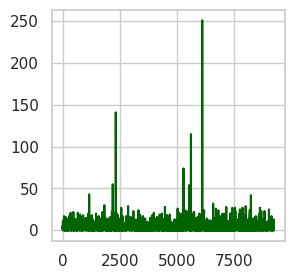

In [458]:
#TOTAL VISITS
ls.TotalVisits.plot(figsize=(3,3), color='darkgreen')

In [459]:
ls.TotalVisits.median()

3.0

In [460]:
ls.TotalVisits.describe()

count    8267.000000
mean        3.785533
std         4.964071
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

As there are outliers in "TotalVisits" column where max value is 251, imputing the missing values with median and the datatype is changed to Int as the count value can't be float

In [461]:
ls.TotalVisits.fillna(ls.TotalVisits.median(), inplace=True)
ls.TotalVisits = ls.TotalVisits.astype('int')

In [462]:
ls["Page Views Per Visit"].fillna(ls["Page Views Per Visit"].median(),inplace=True) #Imputed with median
ls.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                   0.0   
1            5                          674                   2.5   
2            2                         1532                   2.0   
3            1                          305                   1.0   
4            2                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India             Not Provided   
1             Email Opened   India             Not Provided   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India             Not Provided   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    City  \
0          Interested in other courses  Mumbai   
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [463]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8318 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8318 non-null   object 
 1   Lead Source                                    8318 non-null   object 
 2   Do Not Email                                   8318 non-null   object 
 3   Converted                                      8318 non-null   int64  
 4   TotalVisits                                    8318 non-null   int64  
 5   Total Time Spent on Website                    8318 non-null   int64  
 6   Page Views Per Visit                           8318 non-null   float64
 7   Last Activity                                  8318 non-null   object 
 8   Country                                        8318 non-null   object 
 9   Specialization                                 8318 

In [464]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

Data cleaning is completed, modified values by imputing and removing redundant records.

**Step 3: EXPLORATORY DATA ANALYSIS**

In [465]:
ls.columns.tolist()

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [466]:
num_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
obj_col=['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']
print (num_col)
print (obj_col)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [467]:
print(len(obj_col))

13


UNIVARIATE ANALYSIS

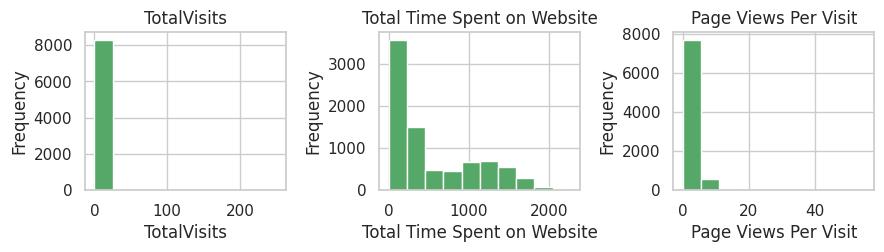

In [468]:
# Numerical Data - Histogram

a=4  # number of rows
b=3  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(9,9))
for i in num_col:
    plt.subplot(a,b,c)
    plt.title('{},subplot:{}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    plt.title(i)
    ls[i].plot.hist(color='g')
    c=c+1
fig.tight_layout()
plt.show()


**observation:**

--> Outliers need to be checked as the plot is skewed and also the peak is relatively high

CATEGORICAL COLUMNS

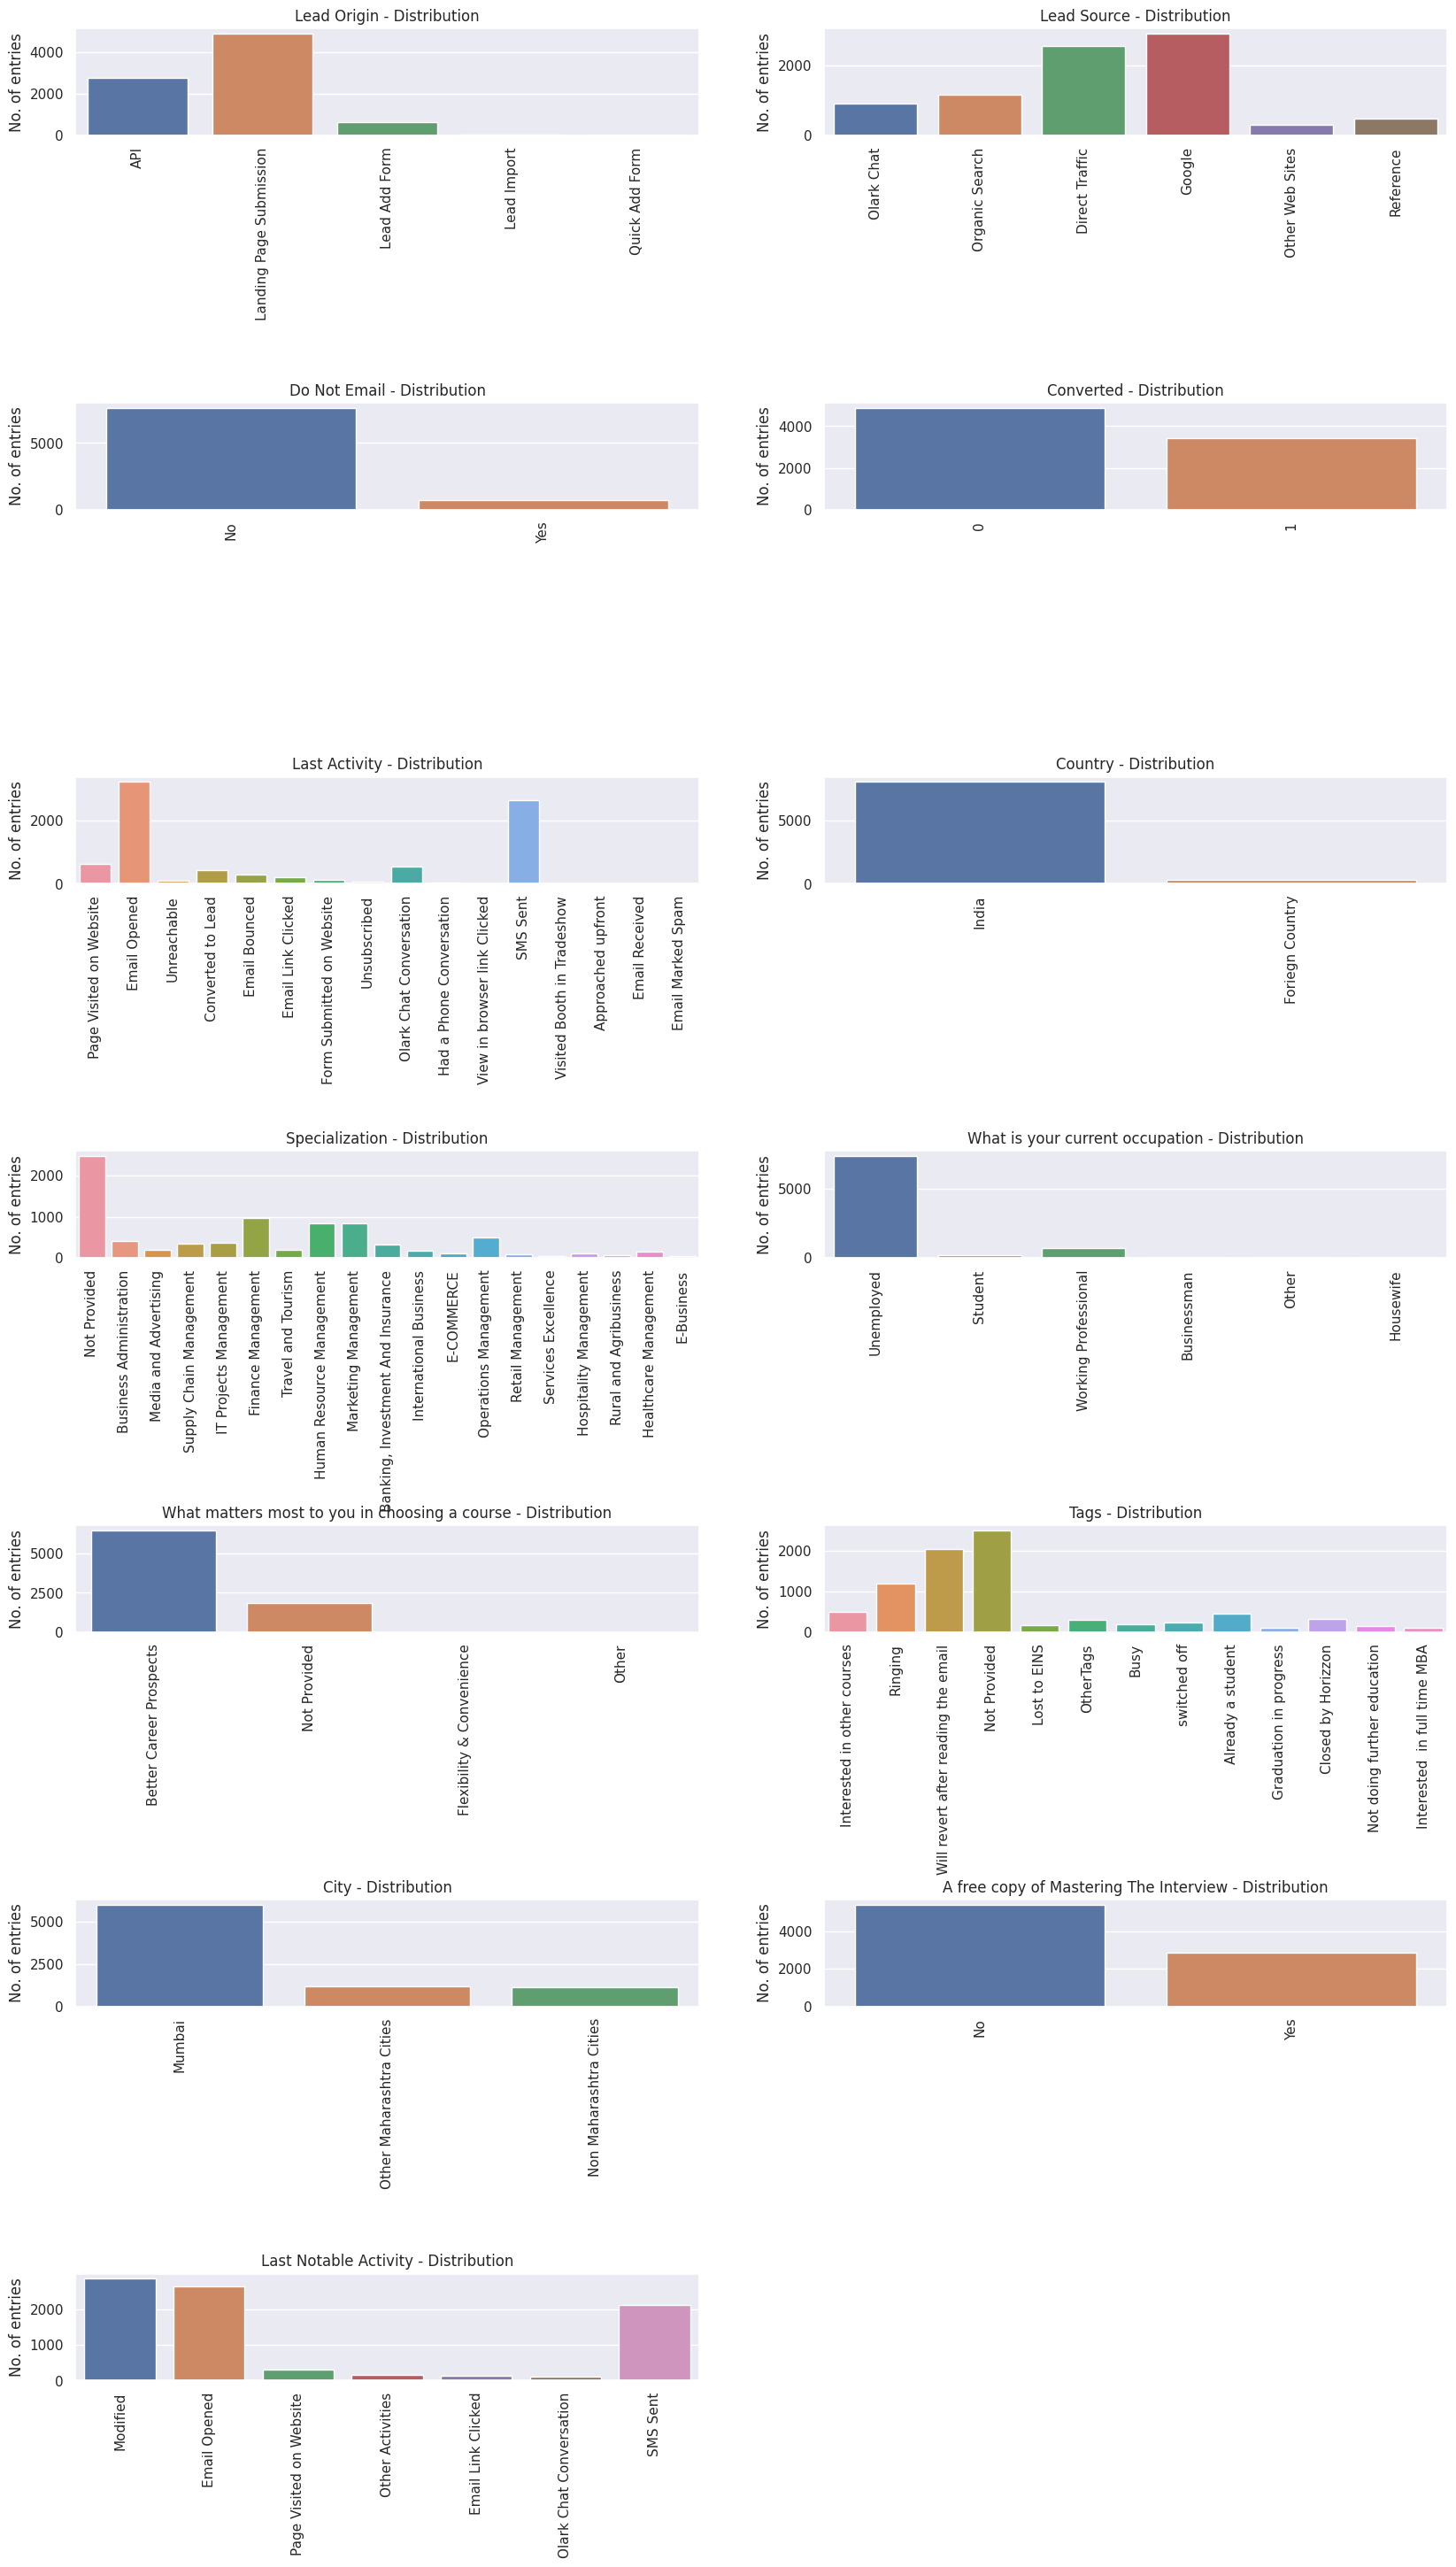

In [469]:
sns.set(style="darkgrid")
# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(20,40))
for i in range(len(obj_col)):
    plt.subplot(8, 2, i+1)
    var=obj_col[i]
    sns.countplot(x=var, data=ls)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

Observations:

-->'Lead Origin' - Landing page submission & API have the highest count

-->'Lead Source' - Google, Direct Traffic have the highest count


-->'Do Not Email' - Most people choosed No, We need to check the percentage of people choosed Yes.

-->'Last Activity' - This also we need to analyse depending on Convereted. SMS Sent and Email Opened are the highest in count

-->'Country' - Maximum customers are from India

--> 'Specialization' - Among the options choosed Finance Management, Human Resource and Marketing Management are higest count but not selected by majority.

--> Also most of the users are currently unemployed.

--> Most of the users are from Mumbai.

PLOTTING CATEGORICAL VARIABLES WRT CONVERTED

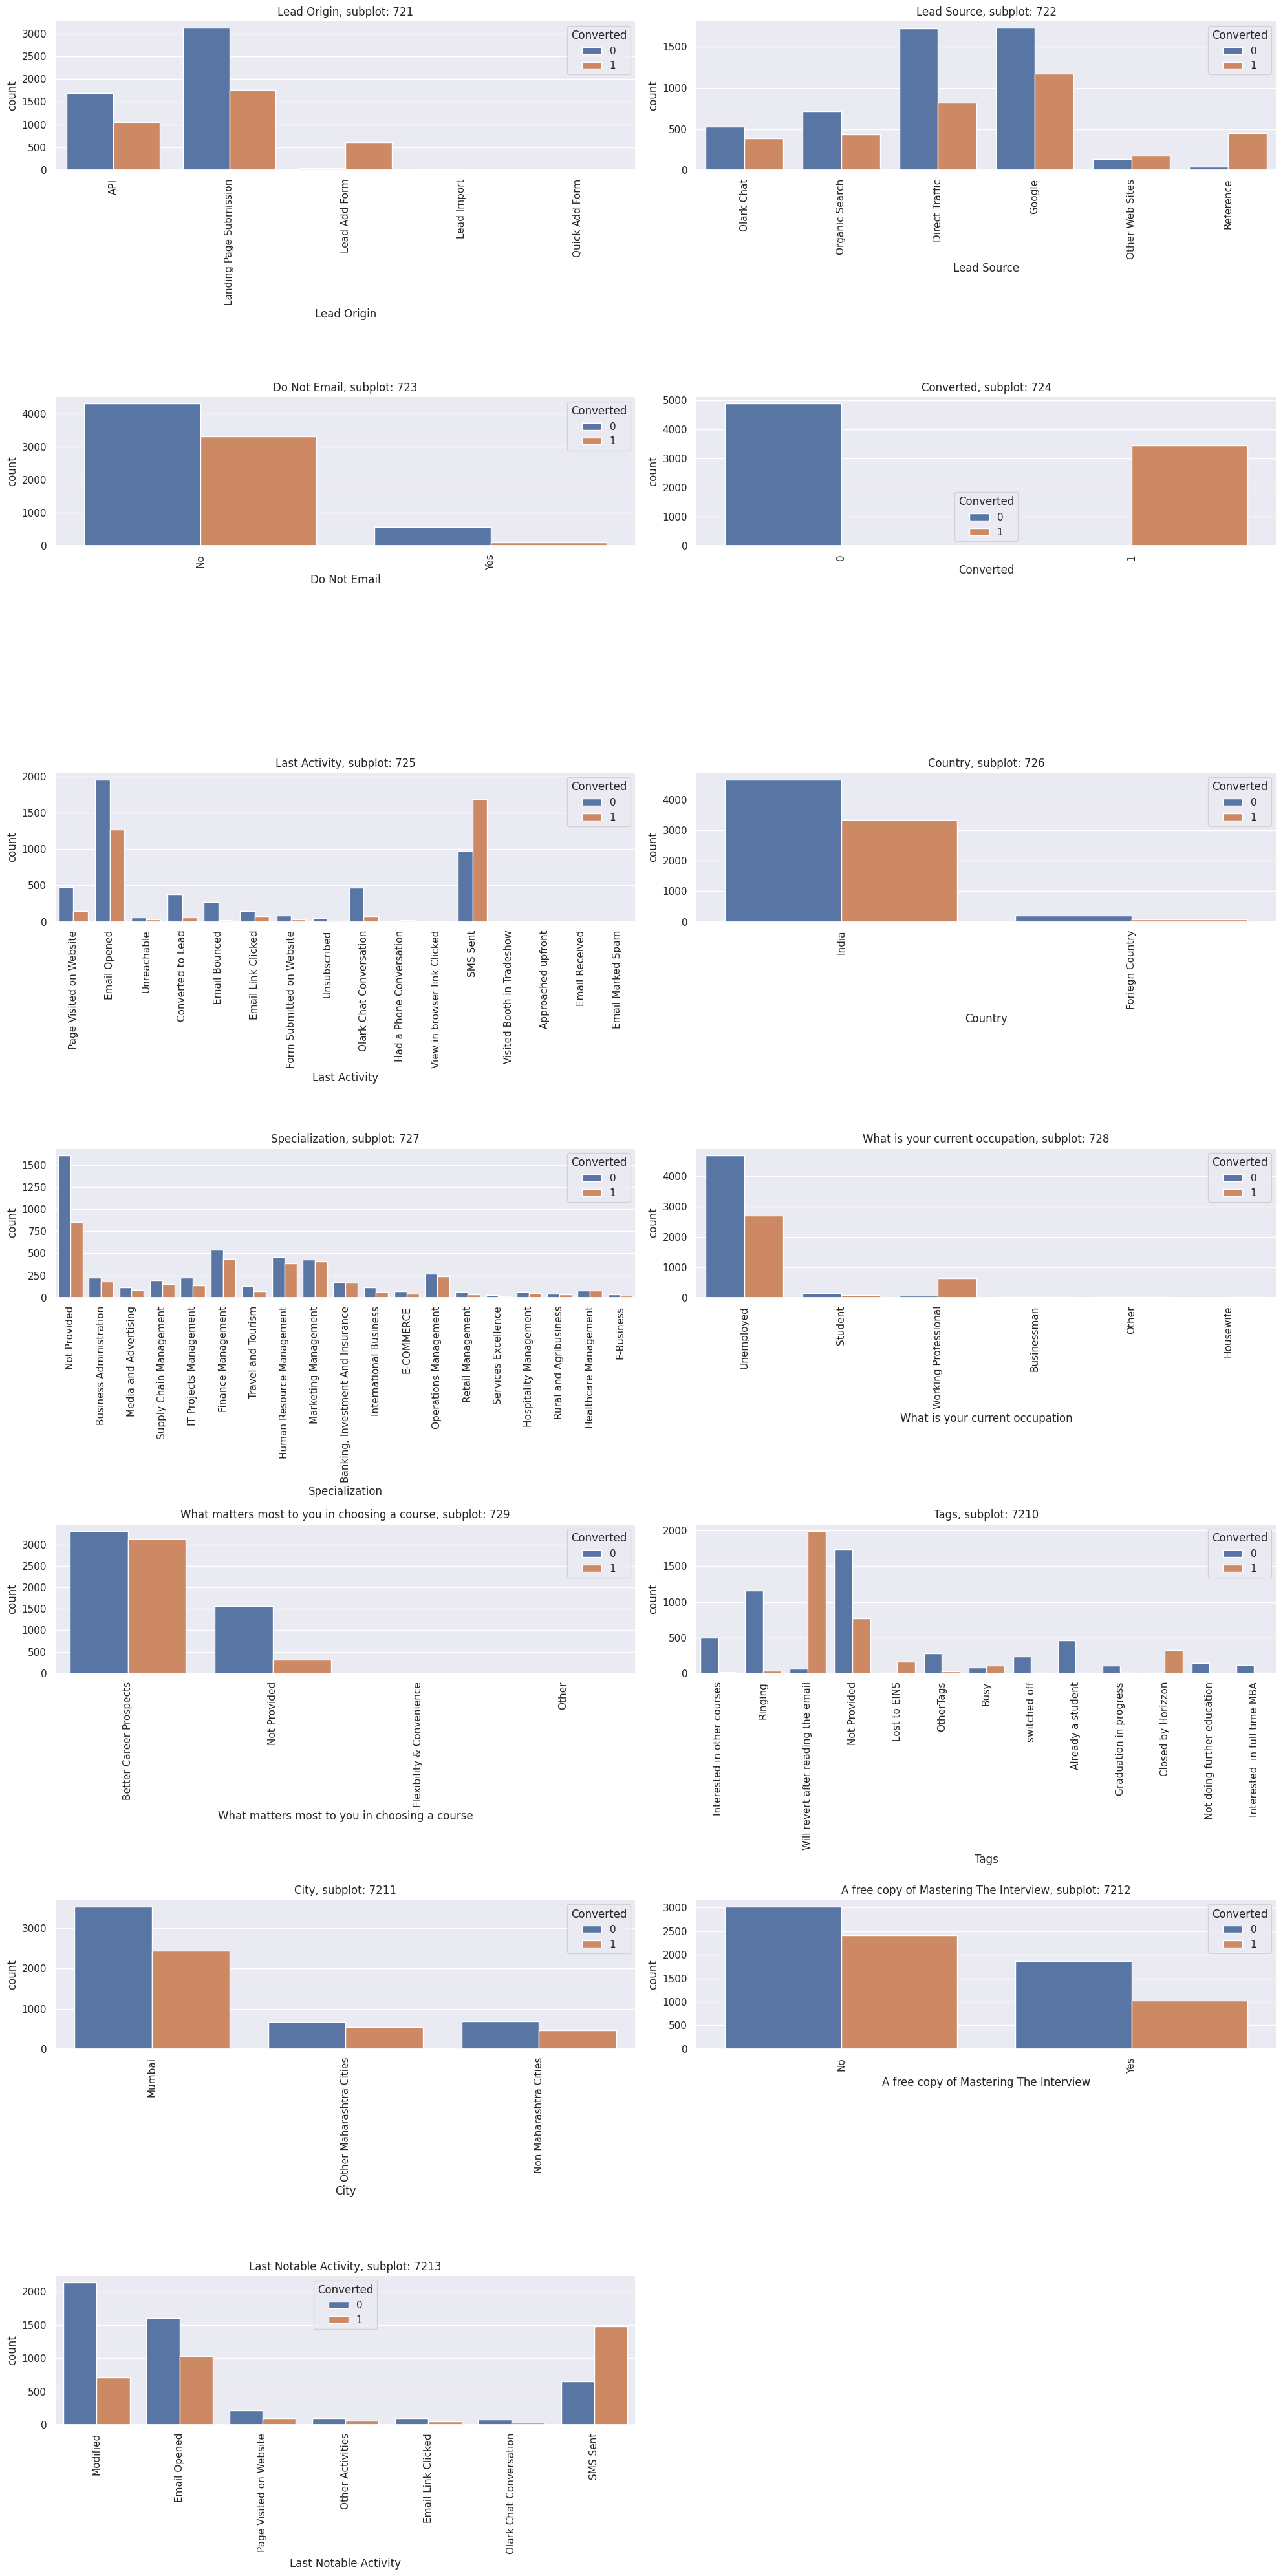

In [470]:
a=7  # number of rows
b=2  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(20,40))
for i in obj_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.countplot(x=ls[i],hue=ls["Converted"]).tick_params(axis='x', rotation = 90)
    c = c + 1
fig.tight_layout()
plt.show()

Observations:

-->'lead Origin'-Leads added from orgin are mostly positively converted

-->'Lead Source'-Leads from Reference and Other websites are also mostly converted positively.

-->Working Professionals convertion ratio is very high

-->'Tags'-Will revert after reading email, Closed by Horizon are getting mostly converted

-->'Last notable Activity' column shows "SMS Sent" have high ratio of positive convertion

OUTLIER ANALYSIS

In [471]:
for i in num_col:
    print("\n")
    print("column Name:",i)
    print(ls[i].value_counts())
    print("\n")
    print("-------------------")



column Name: TotalVisits
2      1676
0      1378
3      1348
4      1120
5       782
6       466
1       385
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       15
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: TotalVisits, dtype: int64


-------------------


column Name: Total Time Spent on Website
0       1382
60        19
74        18
127       18
75        18
        ... 
757        1
696        1
732        1
1672       1
927        1
Name: Total Time Spent on Website, Length: 1722, dtype: int64


-------------------


column Name: Page Views Per Visit
2.00    1844
0.00    1378
3.00    1193
4.00     896
1.00     635
        ... 
2.56       1
6.33       1
1.64       1
8.21

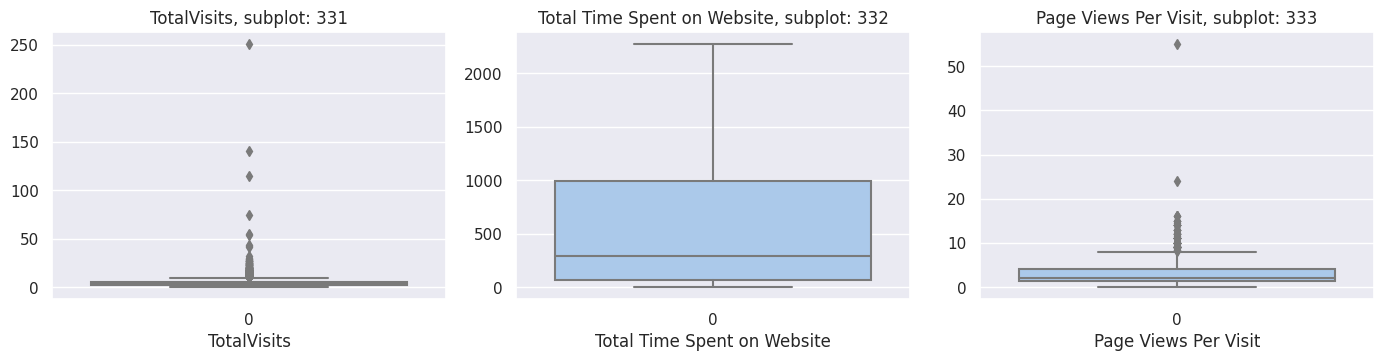

In [472]:
a=3  # number of rows
b=3  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(14,10))
for i in num_col:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.boxplot(ls[i],palette='pastel')
    c=c+1
fig.tight_layout()
plt.show()

Observations:
There are outliers in the "TotalVisits" and "Page View Per Visit" Columns. Either we can drop them or reassign outlier values to 99 percentile.

TOTAL VISITS

In [473]:
ls.TotalVisits.quantile([0.5,0.7,0.9,0.95,0.99])

0.50     3.0
0.70     4.0
0.90     8.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [474]:
print(ls.TotalVisits.quantile(0.99))
print('No of rows with values more than 99 percentile:',len(ls[ls.TotalVisits >ls.TotalVisits.quantile(0.99)]))

17.0
No of rows with values more than 99 percentile: 83


In [475]:
ls['TotalVisits']=np.where(ls["TotalVisits"]> ls["TotalVisits"].quantile(0.99),ls["TotalVisits"].quantile(0.99), ls["TotalVisits"])

In [476]:
print(ls.TotalVisits.quantile(0.99))
print('No of rows with values more than 99 percentile:',len(ls[ls.TotalVisits >ls.TotalVisits.quantile(0.99)]))

17.0
No of rows with values more than 99 percentile: 0


PAGE VIEWS PER VISIT

In [477]:
ls["Page Views Per Visit"].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [478]:
print(ls["Page Views Per Visit"].quantile(0.99))
print('No of rows with values more than 99 percentile:',len(ls[ls["Page Views Per Visit"]>ls["Page Views Per Visit"].quantile(0.99)]))

9.0
No of rows with values more than 99 percentile: 75


In [479]:
ls['Page Views Per Visit']=np.where(ls["Page Views Per Visit"]>ls["Page Views Per Visit"].quantile(0.99),ls["Page Views Per Visit"].quantile(0.99), ls["Page Views Per Visit"])

In [480]:
print(ls["Page Views Per Visit"].quantile(0.99))
print('No of rows with values more than 99 percentile:',len(ls[ls["Page Views Per Visit"]>ls["Page Views Per Visit"].quantile(0.99)]))

9.0
No of rows with values more than 99 percentile: 0


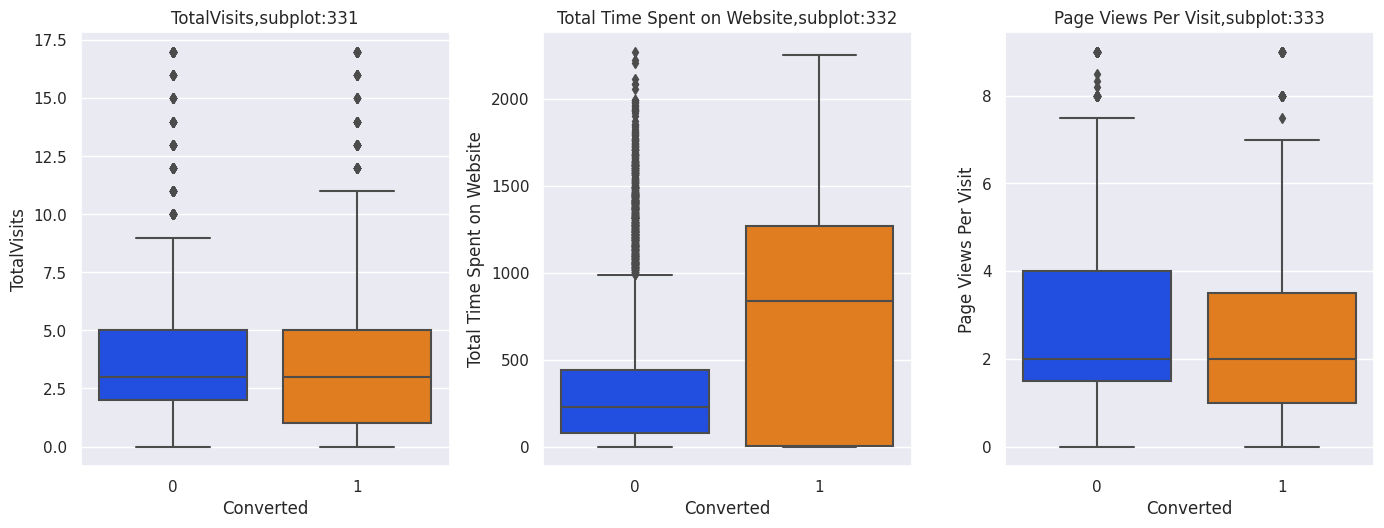

In [481]:
a=3  # number of rows
b=3  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(14,15))
for i in num_col:
    plt.subplot(a,b,c)
    plt.title('{},subplot:{}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    #sns.boxplot(leads[i])
    sns.boxplot(data=ls,y=i,x='Converted',palette='bright')
    c=c+1
fig.tight_layout()
plt.show()

Observation :
Total Time Spent on Website is very high and median value is also high for converted leads

<Figure size 2000x1500 with 0 Axes>

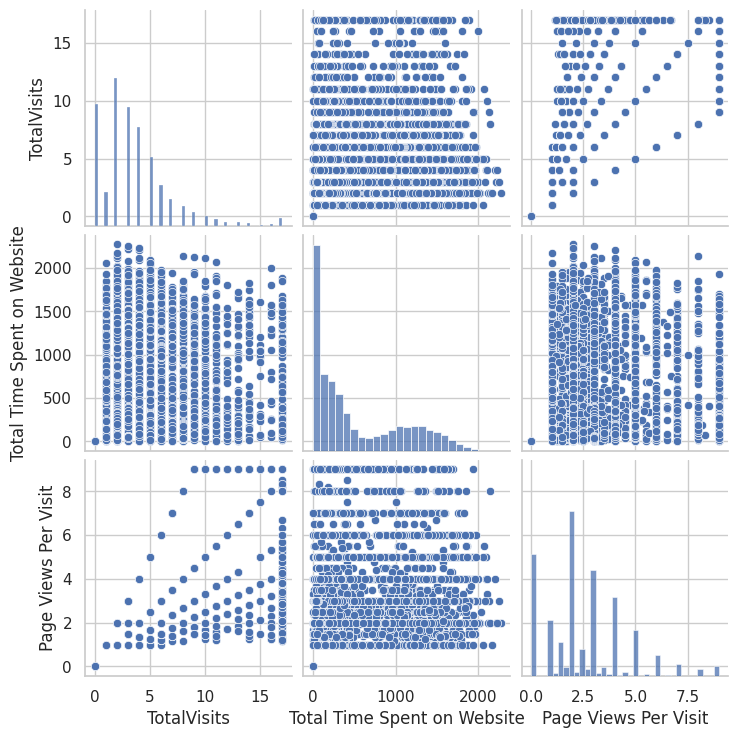

In [482]:
plt.figure(figsize=[20,15])
sns.set_style("whitegrid");
sns.pairplot(ls[num_col]);
plt.show()

Observation:
'TotalVisits' and 'Page Views Per Visits' column are correlated.

DATA IMBALANCE CHECK:
Converted is the Target Variable. Now we will check for this variable and how the data available is distributed

In [483]:
#Percentage of converted to not converted in the dataframe 'ls'

print(round(((ls[ls.Converted==1].shape[0]/ls[ls.Converted==0].shape[0])*100),2),"%")

70.52 %


In [484]:
##Inference: This indicates that the ratio for every converted 1 there are almost 1.7 number of converetd 0's

In [485]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8318 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8318 non-null   object 
 1   Lead Source                                    8318 non-null   object 
 2   Do Not Email                                   8318 non-null   object 
 3   Converted                                      8318 non-null   int64  
 4   TotalVisits                                    8318 non-null   float64
 5   Total Time Spent on Website                    8318 non-null   int64  
 6   Page Views Per Visit                           8318 non-null   float64
 7   Last Activity                                  8318 non-null   object 
 8   Country                                        8318 non-null   object 
 9   Specialization                                 8318 

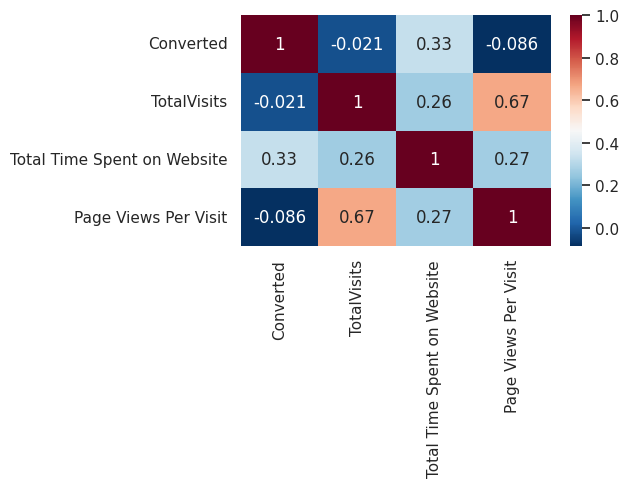

In [486]:
#CORRELATION CHECK

plt.figure(figsize=(5,3))
sns.heatmap(ls.corr(),annot=True,cmap="RdBu_r")
plt.show()

observation: 'Total Visits' & 'Page Views Per Visit' are highly correlated with each other

**STEP 4: DUMMY VARIABLE CREATION**

In [487]:
ls.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [488]:
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

RENAMING COLUMNS

In [489]:
ls.rename(columns={'Lead Origin':'Lead_Origin','Lead Source':'Lead_Source','Do Not Email':'Email_Opted','Total Time Spent on Website':'Time_On_Website','TotalVisits':'Total_Visits','Page Views Per Visit':'Page_Views','Last Activity':'Last_Activity','What is your current occupation':'Occupation','What matters most to you in choosing a course':'Reason_To_Choose','A free copy of Mastering The Interview':'Mastering_Interview_Copy', 'Last Notable Activity':'Last_Notable_Activity'}, inplace = True)
ls.head()

Lead_Origin     Lead_Source Email_Opted  Converted  \
0                      API      Olark Chat          No          0   
1                      API  Organic Search          No          0   
2  Landing Page Submission  Direct Traffic          No          1   
3  Landing Page Submission  Direct Traffic          No          0   
4  Landing Page Submission          Google          No          1   

   Total_Visits  Time_On_Website  Page_Views            Last_Activity Country  \
0           0.0                0         0.0  Page Visited on Website   India   
1           5.0              674         2.5             Email Opened   India   
2           2.0             1532         2.0             Email Opened   India   
3           1.0              305         1.0              Unreachable   India   
4           2.0             1428         1.0        Converted to Lead   India   

            Specialization  Occupation         Reason_To_Choose  \
0             Not Provided  Unemployed  Better Career Prospects   
1             Not Provided  Unemployed  Better Career Prospects   
2  Business Administration     Student  Better Career Prospects   
3    Media and Advertising  Unemployed  Better Career Prospects   
4             Not Provided  Unemployed  Better Career Prospects   

                                  Tags    City Mastering_Interview_Copy  \
0          Interested in other courses  Mumbai                       No   
1                              Ringing  Mumbai                       No   
2  Will revert after reading the email  Mumbai                      Yes   
3                              Ringing  Mumbai                       No   
4  Will revert after reading the email  Mumbai                       No   

  Last_Notable_Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

Removing the columns added by sales team because our Model is supposed to work before the sales team approach the customer.

In [490]:
ls.drop(['Tags','Last_Notable_Activity','Last_Activity'],axis=1,inplace=True)

In [491]:
ls.columns

Index(['Lead_Origin', 'Lead_Source', 'Email_Opted', 'Converted',
       'Total_Visits', 'Time_On_Website', 'Page_Views', 'Country',
       'Specialization', 'Occupation', 'Reason_To_Choose', 'City',
       'Mastering_Interview_Copy'],
      dtype='object')

In [492]:
ls.Email_Opted.value_counts(dropna=False)

No     7637
Yes     681
Name: Email_Opted, dtype: int64

In [493]:
ls.Email_Opted.apply(lambda x:1 if x=="Yes" else 0).value_counts(dropna=False)

0    7637
1     681
Name: Email_Opted, dtype: int64

In [494]:
ls["Email_Opted"] = ls.Email_Opted.apply(lambda x:1 if x=="Yes" else 0)

In [495]:
ls.head()

Lead_Origin     Lead_Source  Email_Opted  Converted  \
0                      API      Olark Chat            0          0   
1                      API  Organic Search            0          0   
2  Landing Page Submission  Direct Traffic            0          1   
3  Landing Page Submission  Direct Traffic            0          0   
4  Landing Page Submission          Google            0          1   

   Total_Visits  Time_On_Website  Page_Views Country           Specialization  \
0           0.0                0         0.0   India             Not Provided   
1           5.0              674         2.5   India             Not Provided   
2           2.0             1532         2.0   India  Business Administration   
3           1.0              305         1.0   India    Media and Advertising   
4           2.0             1428         1.0   India             Not Provided   

   Occupation         Reason_To_Choose    City Mastering_Interview_Copy  
0  Unemployed  Better Career Prospects  Mumbai                       No  
1  Unemployed  Better Career Prospects  Mumbai                       No  
2     Student  Better Career Prospects  Mumbai                      Yes  
3  Unemployed  Better Career Prospects  Mumbai                       No  
4  Unemployed  Better Career Prospects  Mumbai                       No

In [496]:
cat_col=['Lead_Origin','Lead_Source','Country','Specialization','Occupation','Reason_To_Choose','City','Mastering_Interview_Copy']
cat_col

['Lead_Origin',
 'Lead_Source',
 'Country',
 'Specialization',
 'Occupation',
 'Reason_To_Choose',
 'City',
 'Mastering_Interview_Copy']

Creating Dummy Variables for Categorical columns

In [497]:
dummy_1=pd.get_dummies(ls[cat_col],drop_first=True)
#Adding the resultant dataframe to the main dataframe 'ls'
ls=pd.concat([ls,dummy_1],axis=1)

In [498]:
#Dropping the categorical columns for which the dummies have been created already
ls.drop(cat_col,axis=1,inplace=True)
ls.head()

Email_Opted  Converted  Total_Visits  Time_On_Website  Page_Views  \
0            0          0           0.0                0         0.0   
1            0          0           5.0              674         2.5   
2            0          1           2.0             1532         2.0   
3            0          0           1.0              305         1.0   
4            0          1           2.0             1428         1.0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Origin_Quick Add Form  Lead_Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   ...  Occupation_Other  Occupation_Student  Occupation_Unemployed  \
0  ...                 0                   0                      1   
1  ...                 0                   0                      1   
2  ...                 0                   1                      0   
3  ...                 0                   0                      1   
4  ...                 0                   0                      1   

   Occupation_Working Professional  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Reason_To_Choose_Flexibility & Convenience  Reason_To_Choose_Not Provided  \
0                                           0                              0   
1                                           0                              0   
2                                           0                              0   
3                                           0                              0   
4                                           0                              0   

   Reason_To_Choose_Other  City_Non Maharashtra Cities  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   City_Other Maharashtra Cities  Mastering_Interview_Copy_Yes  
0                              0                             0  
1                              0                             0  
2                              0                             1  
3                              0                             0  
4                              0                             0  

[5 rows x 44 columns]

In [499]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8318 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Email_Opted                                 8318 non-null   int64  
 1   Converted                                   8318 non-null   int64  
 2   Total_Visits                                8318 non-null   float64
 3   Time_On_Website                             8318 non-null   int64  
 4   Page_Views                                  8318 non-null   float64
 5   Lead_Origin_Landing Page Submission         8318 non-null   uint8  
 6   Lead_Origin_Lead Add Form                   8318 non-null   uint8  
 7   Lead_Origin_Lead Import                     8318 non-null   uint8  
 8   Lead_Origin_Quick Add Form                  8318 non-null   uint8  
 9   Lead_Source_Google                          8318 non-null   uint8  
 10  Lead_Source_

**STEP 5: TEST TRAIN SPLIT FOR BUILDING MODEL**

In [500]:
#assigning response variable to y
y=ls['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [501]:
#assigning feature variable to X
X=ls.drop('Converted',axis=1)
X.head()

Email_Opted  Total_Visits  Time_On_Website  Page_Views  \
0            0           0.0                0         0.0   
1            0           5.0              674         2.5   
2            0           2.0             1532         2.0   
3            0           1.0              305         1.0   
4            0           2.0             1428         1.0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Origin_Quick Add Form  Lead_Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead_Source_Olark Chat  ...  Occupation_Other  Occupation_Student  \
0                       1  ...                 0                   0   
1                       0  ...                 0                   0   
2                       0  ...                 0                   1   
3                       0  ...                 0                   0   
4                       0  ...                 0                   0   

   Occupation_Unemployed  Occupation_Working Professional  \
0                      1                                0   
1                      1                                0   
2                      0                                0   
3                      1                                0   
4                      1                                0   

   Reason_To_Choose_Flexibility & Convenience  Reason_To_Choose_Not Provided  \
0                                           0                              0   
1                                           0                              0   
2                                           0                              0   
3                                           0                              0   
4                                           0                              0   

   Reason_To_Choose_Other  City_Non Maharashtra Cities  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   City_Other Maharashtra Cities  Mastering_Interview_Copy_Yes  
0                              0                             0  
1                              0                             0  
2                              0                             1  
3                              0                             0  
4                              0                             0  

[5 rows x 43 columns]

In [502]:
#splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [503]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 2549 to 6258
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Email_Opted                                 5822 non-null   int64  
 1   Total_Visits                                5822 non-null   float64
 2   Time_On_Website                             5822 non-null   int64  
 3   Page_Views                                  5822 non-null   float64
 4   Lead_Origin_Landing Page Submission         5822 non-null   uint8  
 5   Lead_Origin_Lead Add Form                   5822 non-null   uint8  
 6   Lead_Origin_Lead Import                     5822 non-null   uint8  
 7   Lead_Origin_Quick Add Form                  5822 non-null   uint8  
 8   Lead_Source_Google                          5822 non-null   uint8  
 9   Lead_Source_Olark Chat                      5822 non-null   uint8  
 10  Lead_Sour

**STEP 6: FEATURE SCALING**

In [504]:
scaler = StandardScaler()

In [505]:
num_col=['Total_Visits','Time_On_Website','Page_Views']
num_col

['Total_Visits', 'Time_On_Website', 'Page_Views']

In [506]:
X_train[num_col]=scaler.fit_transform(X_train[num_col])
X_train.head()

Email_Opted  Total_Visits  Time_On_Website  Page_Views  \
2549            0     -0.517873         0.590521   -0.295462   
6933            0     -1.132001        -0.966806   -1.322002   
430             0      1.324509        -0.539768    2.784156   
1104            0     -0.517873        -0.463446   -0.295462   
5717            0      0.096254        -0.063665    0.731077   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
2549                                    0                          0   
6933                                    0                          1   
430                                     1                          0   
1104                                    1                          0   
5717                                    1                          0   

      Lead_Origin_Lead Import  Lead_Origin_Quick Add Form  Lead_Source_Google  \
2549                        0                           0                   1   
6933                        0                           0                   0   
430                         0                           0                   1   
1104                        0                           0                   1   
5717                        0                           0                   0   

      Lead_Source_Olark Chat  ...  Occupation_Other  Occupation_Student  \
2549                       0  ...                 0                   0   
6933                       0  ...                 0                   0   
430                        0  ...                 0                   0   
1104                       0  ...                 0                   0   
5717                       0  ...                 0                   0   

      Occupation_Unemployed  Occupation_Working Professional  \
2549                      0                                1   
6933                      1                                0   
430                       1                                0   
1104                      1                                0   
5717                      1                                0   

      Reason_To_Choose_Flexibility & Convenience  \
2549                                           0   
6933                                           0   
430                                            0   
1104                                           0   
5717                                           0   

      Reason_To_Choose_Not Provided  Reason_To_Choose_Other  \
2549                              0                       0   
6933                              0                       0   
430                               0                       0   
1104                              0                       0   
5717                              0                       0   

      City_Non Maharashtra Cities  City_Other Maharashtra Cities  \
2549                            0                              0   
6933                            0                              0   
430                             0                              0   
1104                            0                              0   
5717                            0                              0   

      Mastering_Interview_Copy_Yes  
2549                             0  
6933                             0  
430                              0  
1104                             0  
5717                             1  

[5 rows x 43 columns]

In [507]:
convertion_rate=(sum(ls["Converted"])/len(ls.index))*100
convertion_rate

41.35609521519596

**STEP 7: BUILDING CORRELATION MATRIX AND FINE-TUNING THE COLUMNS**

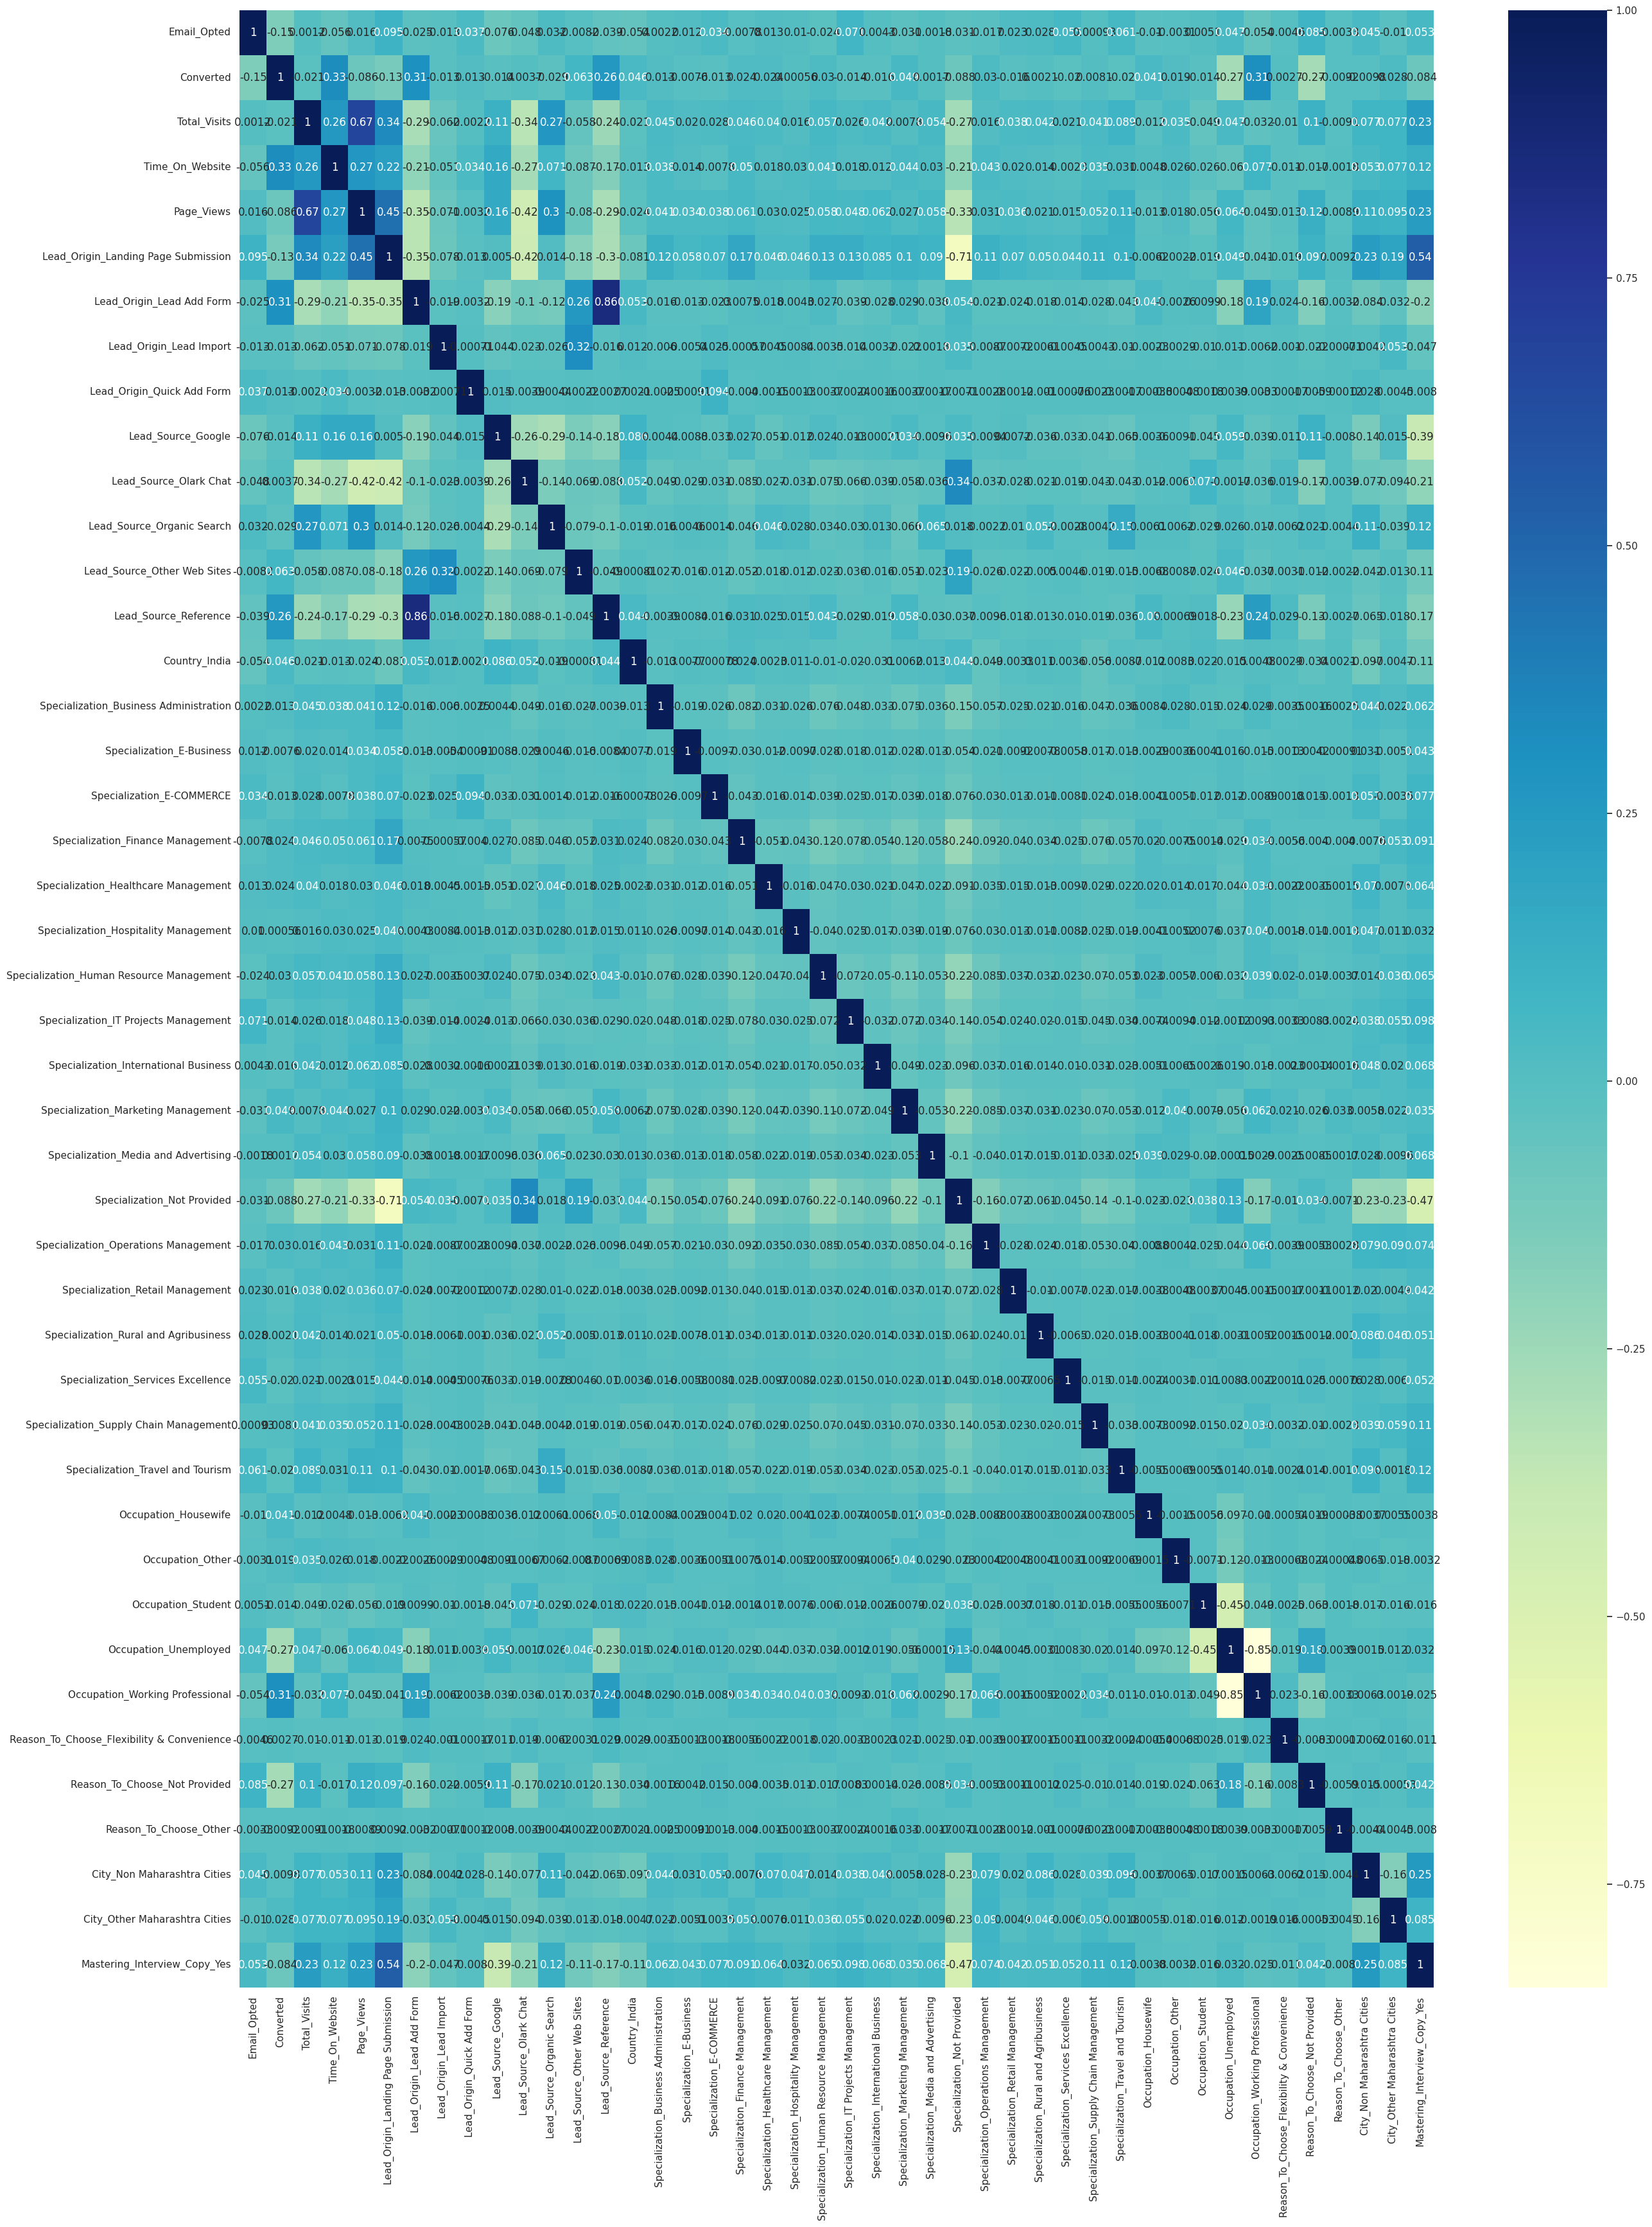

In [508]:
plt.figure(figsize=(30,40))
sns.heatmap(ls.corr(),annot =True,cmap="YlGnBu")
plt.show()

In [509]:
##CORRELATION MATRIX BUILDING

lead_df=ls.corr().abs()
leadcorr=lead_df.where(np.triu(np.ones(lead_df.shape),k=1).astype(np.bool)).unstack().reset_index()
leadcorr.columns=['Column1','Column2','Correlation']
leadcorr.dropna(subset=['Correlation'],inplace=True)
leadcorr=leadcorr.sort_values(by=['Correlation'],ascending=False)
leadcorr.head(25)

Column1  \
578                 Lead_Source_Reference   
1664      Occupation_Working Professional   
1149          Specialization_Not Provided   
178                            Page_Views   
1897         Mastering_Interview_Copy_Yes   
1918         Mastering_Interview_Copy_Yes   
224   Lead_Origin_Landing Page Submission   
1619                Occupation_Unemployed   
444                Lead_Source_Olark Chat   
445                Lead_Source_Olark Chat   
1901         Mastering_Interview_Copy_Yes   
269             Lead_Origin_Lead Add Form   
268             Lead_Origin_Lead Add Form   
222   Lead_Origin_Landing Page Submission   
1154          Specialization_Not Provided   
442                Lead_Source_Olark Chat   
1148          Specialization_Not Provided   
133                       Time_On_Website   
535           Lead_Source_Other Web Sites   
1629      Occupation_Working Professional   
265             Lead_Origin_Lead Add Form   
488            Lead_Source_Organic Search   
577                 Lead_Source_Reference   
493            Lead_Source_Organic Search   
266             Lead_Origin_Lead Add Form   

                                  Column2  Correlation  
578             Lead_Origin_Lead Add Form     0.855540  
1664                Occupation_Unemployed     0.846595  
1149  Lead_Origin_Landing Page Submission     0.708863  
178                          Total_Visits     0.668853  
1897  Lead_Origin_Landing Page Submission     0.537866  
1918          Specialization_Not Provided     0.470783  
224                            Page_Views     0.454194  
1619                   Occupation_Student     0.450877  
444                            Page_Views     0.423095  
445   Lead_Origin_Landing Page Submission     0.419993  
1901                   Lead_Source_Google     0.385638  
269   Lead_Origin_Landing Page Submission     0.348549  
268                            Page_Views     0.345860  
222                          Total_Visits     0.339482  
1154               Lead_Source_Olark Chat     0.338181  
442                          Total_Visits     0.335166  
1148                           Page_Views     0.331474  
133                             Converted     0.326696  
535               Lead_Origin_Lead Import     0.319509  
1629                            Converted     0.308708  
265                             Converted     0.307044  
488                            Page_Views     0.298421  
577   Lead_Origin_Landing Page Submission     0.298198  
493                    Lead_Source_Google     0.293866  
266                          Total_Visits     0.289807

In [510]:
'''Removing Highly Correlated top Columns like
"Lead_Source_Reference","Occupation_Working Professional","Specialization_Not Provided","Page_Views"'''

high_corr_col=["Lead_Source_Reference","Occupation_Working Professional","Specialization_Not Provided","Page_Views"]

In [511]:
X_test=X_test.drop(high_corr_col,1)
X_train=X_train.drop(high_corr_col,1)

In [512]:
#correlation matrix building
lead_df=X_train.corr().abs()
leadcorr=lead_df.where(np.triu(np.ones(lead_df.shape),k=1).astype(np.bool)).unstack().reset_index()
leadcorr.columns=['Column1','Column2','Correlation']
leadcorr.dropna(subset=['Correlation'],inplace=True)
leadcorr = leadcorr.sort_values(by=['Correlation'],ascending=False)
leadcorr.head(25)

Column1  \
1485         Mastering_Interview_Copy_Yes   
1279                Occupation_Unemployed   
315                Lead_Source_Olark Chat   
1489         Mastering_Interview_Copy_Yes   
159             Lead_Origin_Lead Add Form   
395           Lead_Source_Other Web Sites   
313                Lead_Source_Olark Chat   
118   Lead_Origin_Landing Page Submission   
358            Lead_Source_Organic Search   
157             Lead_Origin_Lead Add Form   
352            Lead_Source_Organic Search   
314                Lead_Source_Olark Chat   
79                        Time_On_Website   
394           Lead_Source_Other Web Sites   
319                Lead_Source_Olark Chat   
1518         Mastering_Interview_Copy_Yes   
1407          City_Non Maharashtra Cities   
1483         Mastering_Interview_Copy_Yes   
1490         Mastering_Interview_Copy_Yes   
119   Lead_Origin_Landing Page Submission   
158             Lead_Origin_Lead Add Form   
1446        City_Other Maharashtra Cities   
1486         Mastering_Interview_Copy_Yes   
1252                Occupation_Unemployed   
277                    Lead_Source_Google   

                                  Column2  Correlation  
1485  Lead_Origin_Landing Page Submission     0.536770  
1279                   Occupation_Student     0.450070  
315   Lead_Origin_Landing Page Submission     0.422347  
1489                   Lead_Source_Google     0.400770  
159   Lead_Origin_Landing Page Submission     0.340097  
395               Lead_Origin_Lead Import     0.335762  
313                          Total_Visits     0.334258  
118                          Total_Visits     0.332014  
358                    Lead_Source_Google     0.297716  
157                          Total_Visits     0.285680  
352                          Total_Visits     0.284156  
314                       Time_On_Website     0.274893  
79                           Total_Visits     0.264754  
394             Lead_Origin_Lead Add Form     0.262606  
319                    Lead_Source_Google     0.262499  
1518          City_Non Maharashtra Cities     0.257841  
1407  Lead_Origin_Landing Page Submission     0.233320  
1483                         Total_Visits     0.223545  
1490               Lead_Source_Olark Chat     0.215021  
119                       Time_On_Website     0.211006  
158                       Time_On_Website     0.209517  
1446  Lead_Origin_Landing Page Submission     0.193348  
1486            Lead_Origin_Lead Add Form     0.191806  
1252            Lead_Origin_Lead Add Form     0.186686  
277             Lead_Origin_Lead Add Form     0.184153

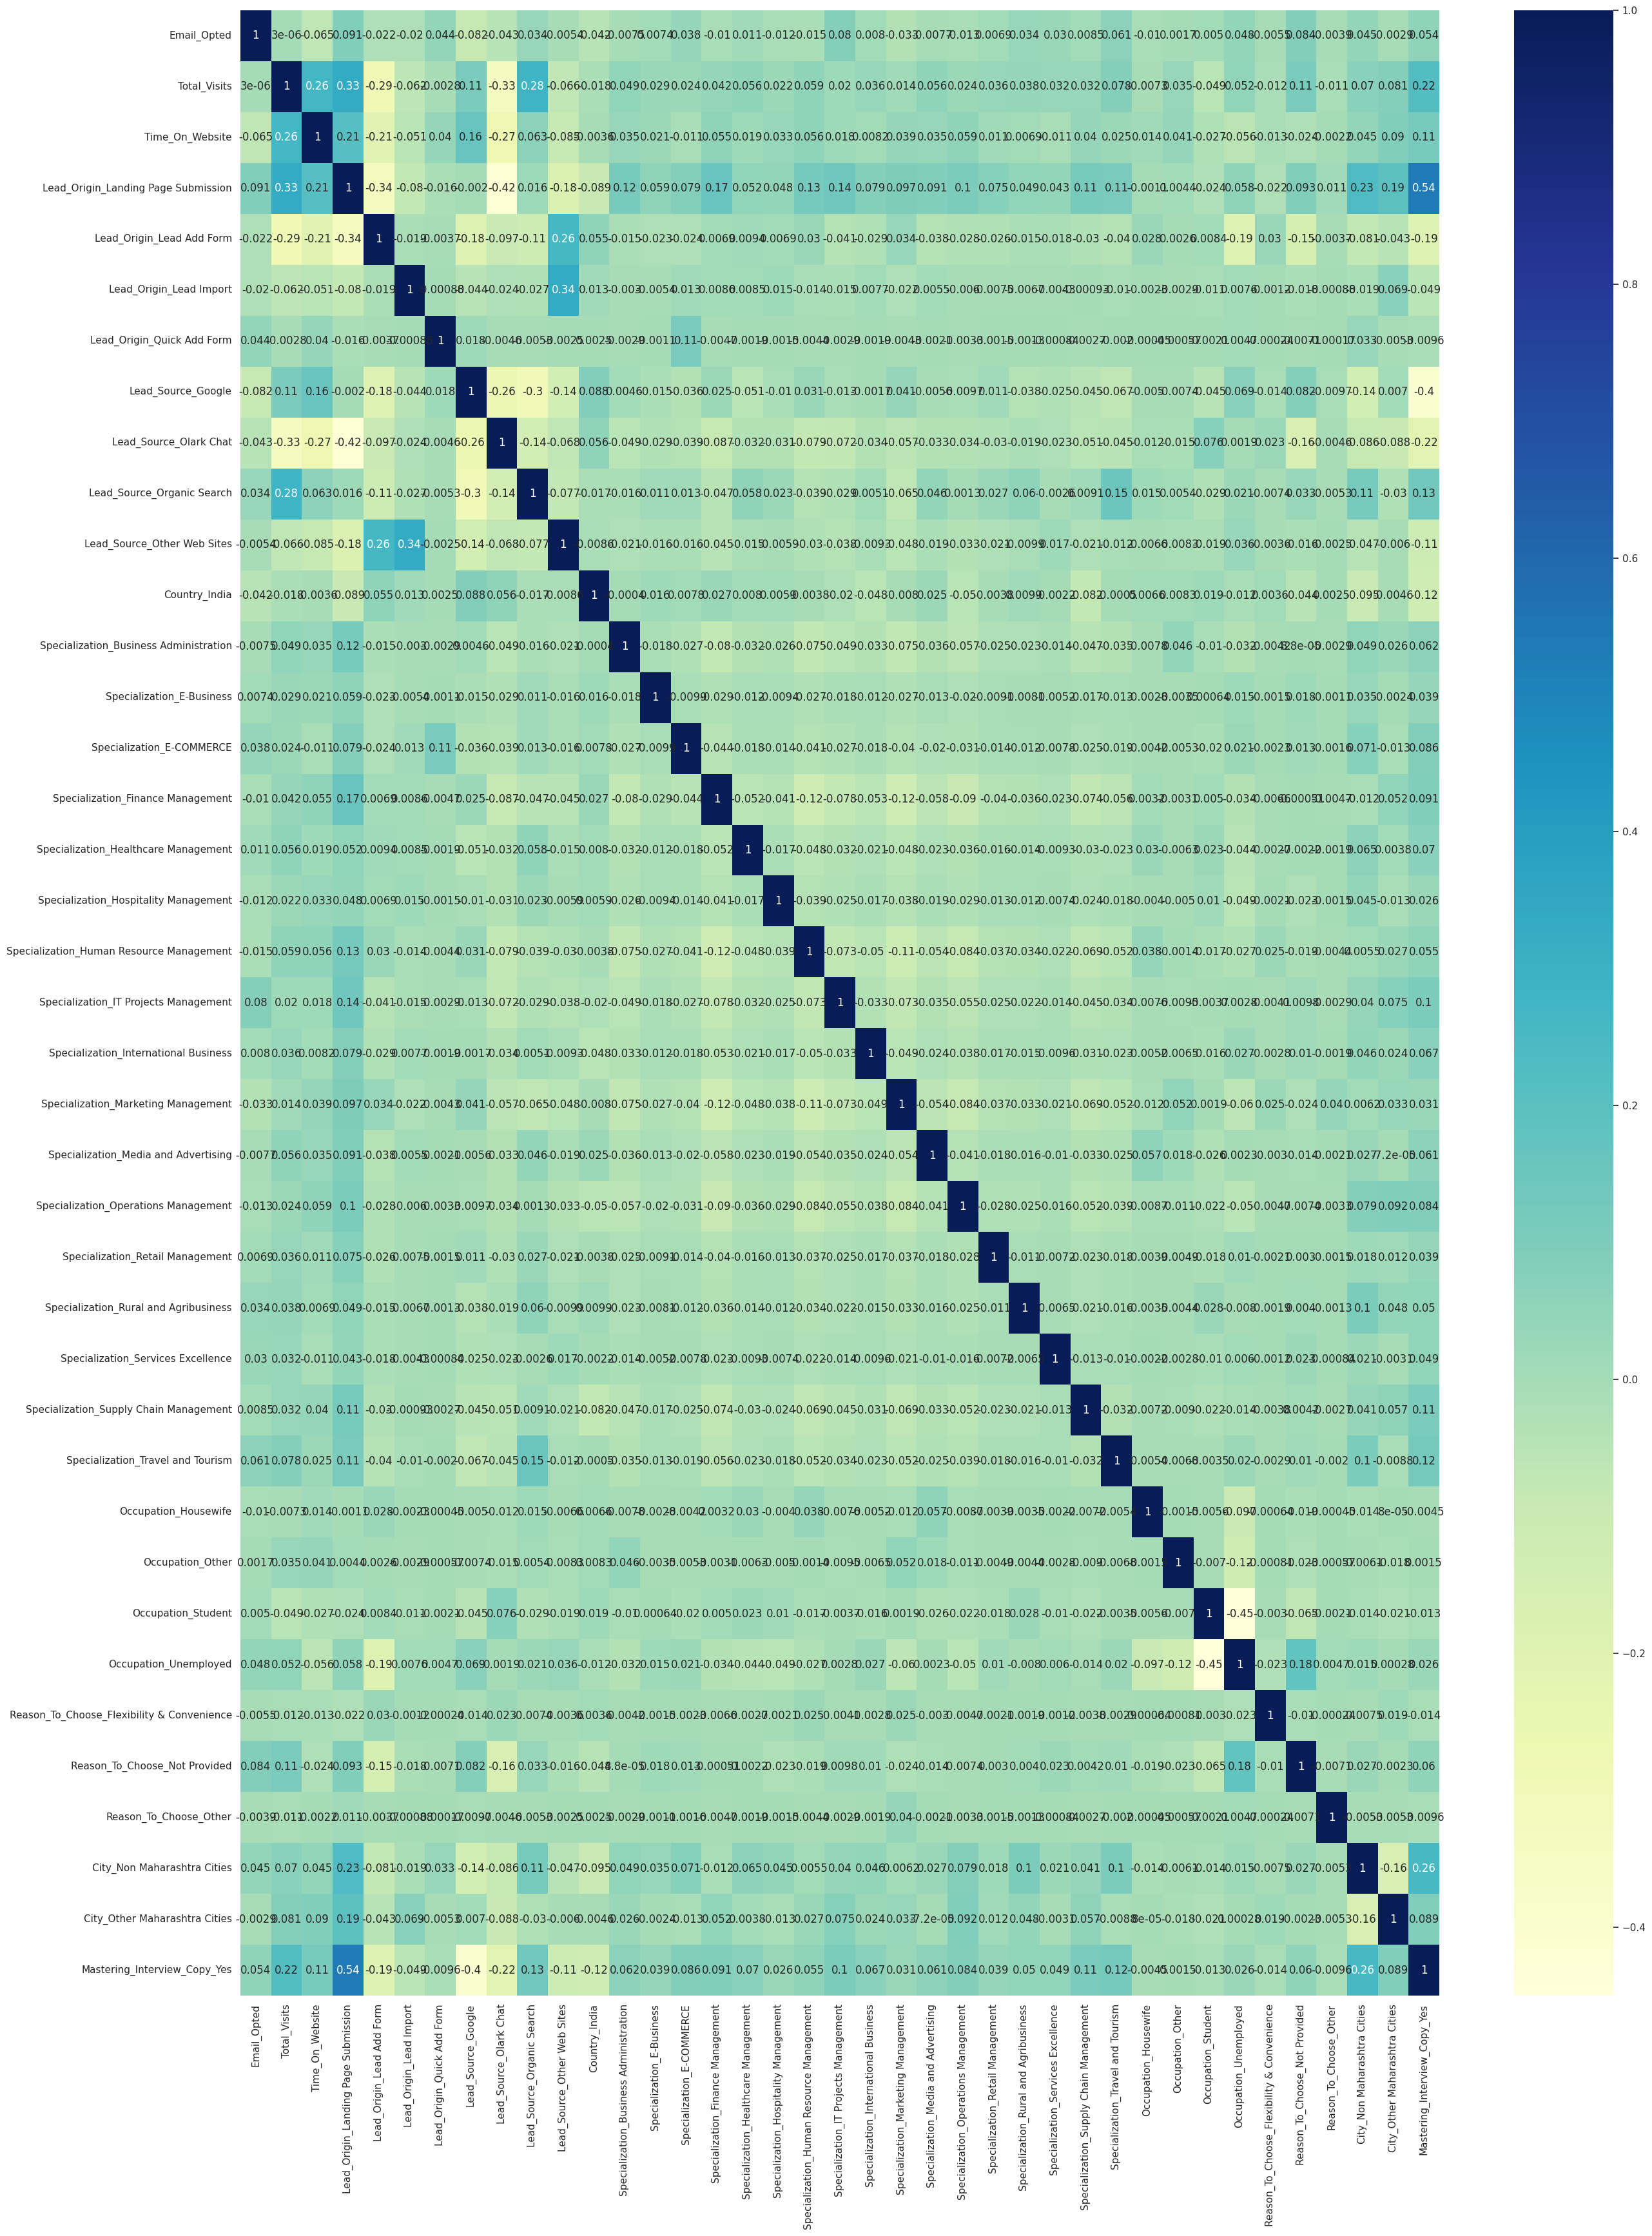

In [513]:
#correlation heatmap

plt.figure(figsize=(30,40))
sns.heatmap(X_train.corr(),annot = True,cmap="YlGnBu")
plt.show()

**STEP 8: MODEL BUILDING**

Feature Selection with RFE, Manual feature selection with VIF, Adjusted R^2 & P value

**LOGISTIC REGRESSION**

**MODEL 1**

In [514]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5782
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.5
Date:                Fri, 26 May 2023   Deviance:                       5277.1
Time:                        12:21:38   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3615
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.0954      0.281      3.892      0.000       0.544       1.647
Email_Opted                                   -1.2183      0.163     -7.488      0.000      -1.537      -0.899
Total_Visits                                   0.1432      0.041      3.525      0.000       0.064       0.223
Time_On_Website                                1.1786      0.041     29.051      0.000       1.099       1.258
Lead_Origin_Landing Page Submission           -0.2238      0.119     -1.879      0.060      -0.457       0.010
Lead_Origin_Lead Add Form                      4.3773      0.232     18.855      0.000       3.922       4.832
Lead_Origin_Lead Import                        0.5567      0.553      1.007      0.314      -0.527       1.640
Lead_Origin_Quick Add Form                    19.9812   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead_Source_Google                             0.4372      0.110      3.978      0.000       0.222       0.653
Lead_Source_Olark Chat                         1.8677      0.159     11.717      0.000       1.555       2.180
Lead_Source_Organic Search                     0.3117      0.122      2.549      0.011       0.072       0.551
Lead_Source_Other Web Sites                    0.4170      0.251      1.661      0.097      -0.075       0.909
Country_India                                  0.1539      0.202      0.763      0.446      -0.242       0.549
Specialization_Business Administration         0.4596      0.188      2.444      0.015       0.091       0.828
Specialization_E-Business                      0.6400      0.411      1.557      0.119      -0.165       1.445
Specialization_E-COMMERCE                      0.6897      0.304      2.271      0.023       0.095       1.285
Specialization_Finance Management              0.4644      0.142      3.278      0.001       0.187       0.742
Specialization_Healthcare Management           0.3757      0.264      1.425      0.154      -0.141       0.892
Specialization_Hospitality Management         -0.5203      0.331     -1.574      0.115      -1.168       0.128
Specialization_Human Resource Management       0.3364      0.144      2.333      0.020       0.054       0.619
Specialization_IT Projects Management          0.3906      0.196      1.996      0.046       0.007       0.774
Specialization_International Business          0.4026      0.248      1.625      0.104      -0.083       0.888
Specialization_Marketing Management            0.4154      0.144      2.890      0.004       0.134       0.697
Specialization_Media and Advertising           0.3471      0.234      1.484      0.138      -0.111       0.805
Specialization_Operations Management           0.4219      0.174      2.422      0.015

In [515]:
#Feature Selection with RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [516]:
rfe=RFE(logreg,n_features_to_select=20, step=1)
rfe=rfe.fit(X_train,y_train)

In [517]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False])

In [518]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Email_Opted', True, 1),
 ('Total_Visits', False, 14),
 ('Time_On_Website', True, 1),
 ('Lead_Origin_Landing Page Submission', False, 12),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Origin_Quick Add Form', False, 16),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Other Web Sites', True, 1),
 ('Country_India', False, 13),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 8),
 ('Specialization_IT Projects Management', False, 7),
 ('Specialization_International Business', False, 5),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising

In [519]:
col=X_train.columns[rfe.support_]

In [520]:
X_train.columns[~rfe.support_]

Index(['Total_Visits', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Quick Add Form', 'Country_India',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Reason_To_Choose_Other',
       'City_Non Maharashtra Cities', 'City_Other Maharashtra Cities',
       'Mastering_Interview_Copy_Yes'],
      dtype='object')

**ASSESSING THE MODEL WITH RESPECT TO STATSMODEL**

**MODEL 2**

In [521]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5801
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.8
Date:                Fri, 26 May 2023   Deviance:                       5321.6
Time:                        12:21:41   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3566
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5085      0.178      8.452      0.000       1.159       1.858
Email_Opted                                   -1.2244      0.161     -7.589      0.000      -1.541      -0.908
Time_On_Website                                1.1974      0.040     29.826      0.000       1.119       1.276
Lead_Origin_Lead Add Form                      4.2187      0.209     20.162      0.000       3.809       4.629
Lead_Origin_Lead Import                        0.5862      0.540      1.085      0.278      -0.472       1.645
Lead_Source_Google                             0.3906      0.086      4.566      0.000       0.223       0.558
Lead_Source_Olark Chat                         1.6257      0.119     13.610      0.000       1.392       1.860
Lead_Source_Organic Search                     0.3465      0.111      3.126      0.002       0.129       0.564
Lead_Source_Other Web Sites                    0.3244      0.245      1.327      0.185      -0.155       0.804
Specialization_Business Administration         0.2008      0.164      1.228      0.219      -0.120       0.521
Specialization_E-Business                      0.3679      0.403      0.912      0.362      -0.423       1.159
Specialization_E-COMMERCE                      0.4485      0.285      1.574      0.115      -0.110       1.007
Specialization_Healthcare Management           0.1867      0.245      0.762      0.446      -0.293       0.667
Specialization_Hospitality Management         -0.7901      0.318     -2.483      0.013      -1.414      -0.166
Specialization_Rural and Agribusiness          0.4114      0.351      1.174      0.241      -0.276       1.098
Occupation_Housewife                          19.9119   1.51e+04      0.001      0.999   -2.96e+04    2.97e+04
Occupation_Other                              -2.4890      0.693     -3.592      0.000      -3.847      -1.131
Occupation_Student                            -2.7752      0.269    -10.299      0.000      -3.303      -2.247
Occupation_Unemployed                         -2.4746      0.176    -14.071      0.000      -2.819      -2.130
Reason_To_Choose_Flexibility & Convenience    -2.3382      3.094     -0.756      0.450      -8.403       3.726
Reason_To_Choose_Not Provided                 -1.2002      0.095    -12.593      0.000      -1.387      -1.013
==============================================================================================================
"""

P-Value is higher for the occupation_Housewife

In [522]:
#VIF Calculation

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
17                       Occupation_Unemployed  3.39
4                           Lead_Source_Google  1.95
5                       Lead_Source_Olark Chat  1.45
19               Reason_To_Choose_Not Provided  1.42
6                   Lead_Source_Organic Search  1.36
7                  Lead_Source_Other Web Sites  1.32
2                    Lead_Origin_Lead Add Form  1.26
1                              Time_On_Website  1.17
3                      Lead_Origin_Lead Import  1.15
0                                  Email_Opted  1.12
16                          Occupation_Student  1.06
8       Specialization_Business Administration  1.05
11        Specialization_Healthcare Management  1.03
13       Specialization_Rural and Agribusiness  1.02
10                   Specialization_E-COMMERCE  1.02
9                    Specialization_E-Business  1.01
12       Specialization_Hospitality Management  1.01
14                        Occupation_Housewife  1.01
15                            Occupation_Other  1.01
18  Reason_To_Choose_Flexibility & Convenience  1.00

As mentioned before P-Value for Occupation_Housewife is higher Hence dropping it.

In [523]:
col=col.drop('Occupation_Housewife',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Other Web Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Flexibility & Convenience',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 3**

In [524]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5802
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.4
Date:                Fri, 26 May 2023   Deviance:                       5322.8
Time:                        12:21:42   Pearson chi2:                 6.26e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3565
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5237      0.178      8.545      0.000       1.174       1.873
Email_Opted                                   -1.2253      0.161     -7.592      0.000      -1.542      -0.909
Time_On_Website                                1.1972      0.040     29.825      0.000       1.119       1.276
Lead_Origin_Lead Add Form                      4.2187      0.209     20.161      0.000       3.809       4.629
Lead_Origin_Lead Import                        0.5851      0.540      1.083      0.279      -0.474       1.644
Lead_Source_Google                             0.3909      0.086      4.569      0.000       0.223       0.559
Lead_Source_Olark Chat                         1.6255      0.119     13.606      0.000       1.391       1.860
Lead_Source_Organic Search                     0.3490      0.111      3.150      0.002       0.132       0.566
Lead_Source_Other Web Sites                    0.3245      0.245      1.327      0.185      -0.155       0.804
Specialization_Business Administration         0.2003      0.164      1.224      0.221      -0.120       0.521
Specialization_E-Business                      0.3676      0.404      0.911      0.362      -0.423       1.158
Specialization_E-COMMERCE                      0.4480      0.285      1.572      0.116      -0.110       1.006
Specialization_Healthcare Management           0.1901      0.244      0.778      0.437      -0.289       0.669
Specialization_Hospitality Management         -0.7928      0.318     -2.490      0.013      -1.417      -0.169
Specialization_Rural and Agribusiness          0.4104      0.351      1.171      0.242      -0.277       1.097
Occupation_Other                              -2.5042      0.693     -3.615      0.000      -3.862      -1.146
Occupation_Student                            -2.7906      0.269    -10.361      0.000      -3.319      -2.263
Occupation_Unemployed                         -2.4901      0.176    -14.175      0.000      -2.834      -2.146
Reason_To_Choose_Flexibility & Convenience    -2.3457      3.105     -0.755      0.450      -8.431       3.740
Reason_To_Choose_Not Provided                 -1.2004      0.095    -12.595      0.000      -1.387      -1.014
==============================================================================================================
"""

In [525]:
#VIF Calculation

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
16                       Occupation_Unemployed  3.39
4                           Lead_Source_Google  1.95
5                       Lead_Source_Olark Chat  1.45
18               Reason_To_Choose_Not Provided  1.42
6                   Lead_Source_Organic Search  1.36
7                  Lead_Source_Other Web Sites  1.32
2                    Lead_Origin_Lead Add Form  1.26
1                              Time_On_Website  1.17
3                      Lead_Origin_Lead Import  1.15
0                                  Email_Opted  1.12
15                          Occupation_Student  1.06
8       Specialization_Business Administration  1.05
11        Specialization_Healthcare Management  1.03
10                   Specialization_E-COMMERCE  1.02
13       Specialization_Rural and Agribusiness  1.02
12       Specialization_Hospitality Management  1.01
14                            Occupation_Other  1.01
9                    Specialization_E-Business  1.01
17  Reason_To_Choose_Flexibility & Convenience  1.00

P-value is higher for Specialization_Healthcare Management hence dropping it.

In [526]:
col=col.drop('Specialization_Healthcare Management',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Other Web Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Flexibility & Convenience',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 4**

In [527]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5803
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.7
Date:                Fri, 26 May 2023   Deviance:                       5323.4
Time:                        12:21:43   Pearson chi2:                 6.27e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3564
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5319      0.178      8.606      0.000       1.183       1.881
Email_Opted                                   -1.2224      0.161     -7.582      0.000      -1.538      -0.906
Time_On_Website                                1.1974      0.040     29.830      0.000       1.119       1.276
Lead_Origin_Lead Add Form                      4.2206      0.209     20.172      0.000       3.811       4.631
Lead_Origin_Lead Import                        0.5941      0.539      1.103      0.270      -0.462       1.650
Lead_Source_Google                             0.3875      0.085      4.536      0.000       0.220       0.555
Lead_Source_Olark Chat                         1.6216      0.119     13.588      0.000       1.388       1.855
Lead_Source_Organic Search                     0.3514      0.111      3.173      0.002       0.134       0.568
Lead_Source_Other Web Sites                    0.3190      0.244      1.305      0.192      -0.160       0.798
Specialization_Business Administration         0.1959      0.163      1.198      0.231      -0.124       0.516
Specialization_E-Business                      0.3621      0.403      0.898      0.369      -0.429       1.153
Specialization_E-COMMERCE                      0.4426      0.285      1.554      0.120      -0.116       1.001
Specialization_Hospitality Management         -0.7980      0.318     -2.506      0.012      -1.422      -0.174
Specialization_Rural and Agribusiness          0.4041      0.350      1.153      0.249      -0.283       1.091
Occupation_Other                              -2.5114      0.693     -3.626      0.000      -3.869      -1.154
Occupation_Student                            -2.7876      0.269    -10.361      0.000      -3.315      -2.260
Occupation_Unemployed                         -2.4930      0.176    -14.196      0.000      -2.837      -2.149
Reason_To_Choose_Flexibility & Convenience    -2.3513      3.111     -0.756      0.450      -8.449       3.746
Reason_To_Choose_Not Provided                 -1.2001      0.095    -12.592      0.000      -1.387      -1.013
==============================================================================================================
"""

In [528]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
15                       Occupation_Unemployed  3.37
4                           Lead_Source_Google  1.95
5                       Lead_Source_Olark Chat  1.44
17               Reason_To_Choose_Not Provided  1.42
6                   Lead_Source_Organic Search  1.36
7                  Lead_Source_Other Web Sites  1.32
2                    Lead_Origin_Lead Add Form  1.25
1                              Time_On_Website  1.17
3                      Lead_Origin_Lead Import  1.15
0                                  Email_Opted  1.11
14                          Occupation_Student  1.06
8       Specialization_Business Administration  1.05
10                   Specialization_E-COMMERCE  1.02
12       Specialization_Rural and Agribusiness  1.02
11       Specialization_Hospitality Management  1.01
13                            Occupation_Other  1.01
9                    Specialization_E-Business  1.01
16  Reason_To_Choose_Flexibility & Convenience  1.00

p- value is higher for Reason_To_Choose_Flexibility & Convenience Hence dropping it

In [529]:
col=col.drop('Reason_To_Choose_Flexibility & Convenience',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Other Web Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 5**

In [530]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5804
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.1
Date:                Fri, 26 May 2023   Deviance:                       5324.1
Time:                        12:21:44   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.5307      0.178      8.601      0.000       1.182       1.880
Email_Opted                               -1.2220      0.161     -7.580      0.000      -1.538      -0.906
Time_On_Website                            1.1974      0.040     29.831      0.000       1.119       1.276
Lead_Origin_Lead Add Form                  4.2187      0.209     20.167      0.000       3.809       4.629
Lead_Origin_Lead Import                    0.5935      0.539      1.102      0.270      -0.462       1.649
Lead_Source_Google                         0.3876      0.085      4.537      0.000       0.220       0.555
Lead_Source_Olark Chat                     1.6193      0.119     13.573      0.000       1.385       1.853
Lead_Source_Organic Search                 0.3515      0.111      3.174      0.002       0.134       0.569
Lead_Source_Other Web Sites                0.3197      0.244      1.308      0.191      -0.159       0.799
Specialization_Business Administration     0.1961      0.163      1.200      0.230      -0.124       0.516
Specialization_E-Business                  0.3621      0.403      0.898      0.369      -0.429       1.153
Specialization_E-COMMERCE                  0.4427      0.285      1.554      0.120      -0.116       1.001
Specialization_Hospitality Management     -0.7977      0.318     -2.505      0.012      -1.422      -0.174
Specialization_Rural and Agribusiness      0.4043      0.350      1.154      0.249      -0.283       1.091
Occupation_Other                          -2.5103      0.693     -3.624      0.000      -3.868      -1.153
Occupation_Student                        -2.7855      0.269    -10.354      0.000      -3.313      -2.258
Occupation_Unemployed                     -2.4919      0.176    -14.191      0.000      -2.836      -2.148
Reason_To_Choose_Not Provided             -1.2000      0.095    -12.592      0.000      -1.387      -1.013
==========================================================================================================
"""

In [531]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
15                   Occupation_Unemployed  3.37
4                       Lead_Source_Google  1.95
5                   Lead_Source_Olark Chat  1.44
16           Reason_To_Choose_Not Provided  1.42
6               Lead_Source_Organic Search  1.36
7              Lead_Source_Other Web Sites  1.32
2                Lead_Origin_Lead Add Form  1.25
1                          Time_On_Website  1.17
3                  Lead_Origin_Lead Import  1.15
0                              Email_Opted  1.11
14                      Occupation_Student  1.06
8   Specialization_Business Administration  1.05
10               Specialization_E-COMMERCE  1.02
12   Specialization_Rural and Agribusiness  1.02
11   Specialization_Hospitality Management  1.01
13                        Occupation_Other  1.01
9                Specialization_E-Business  1.01

p-value is higher for Specialization_E-Business. Hence dropping it.

In [532]:
col=col.drop('Specialization_E-Business',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Other Web Sites', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 6**

In [533]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5805
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Fri, 26 May 2023   Deviance:                       5324.9
Time:                        12:21:44   Pearson chi2:                 6.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.5346      0.178      8.626      0.000       1.186       1.883
Email_Opted                               -1.2224      0.161     -7.581      0.000      -1.538      -0.906
Time_On_Website                            1.1976      0.040     29.837      0.000       1.119       1.276
Lead_Origin_Lead Add Form                  4.2152      0.209     20.154      0.000       3.805       4.625
Lead_Origin_Lead Import                    0.5930      0.538      1.101      0.271      -0.462       1.648
Lead_Source_Google                         0.3842      0.085      4.503      0.000       0.217       0.551
Lead_Source_Olark Chat                     1.6143      0.119     13.550      0.000       1.381       1.848
Lead_Source_Organic Search                 0.3493      0.111      3.155      0.002       0.132       0.566
Lead_Source_Other Web Sites                0.3157      0.244      1.293      0.196      -0.163       0.795
Specialization_Business Administration     0.1927      0.163      1.180      0.238      -0.128       0.513
Specialization_E-COMMERCE                  0.4387      0.285      1.541      0.123      -0.119       0.997
Specialization_Hospitality Management     -0.8005      0.318     -2.515      0.012      -1.424      -0.177
Specialization_Rural and Agribusiness      0.4007      0.350      1.144      0.253      -0.286       1.087
Occupation_Other                          -2.5120      0.693     -3.627      0.000      -3.869      -1.155
Occupation_Student                        -2.7826      0.269    -10.345      0.000      -3.310      -2.255
Occupation_Unemployed                     -2.4908      0.176    -14.187      0.000      -2.835      -2.147
Reason_To_Choose_Not Provided             -1.1978      0.095    -12.579      0.000      -1.384      -1.011
==========================================================================================================
"""

In [534]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
14                   Occupation_Unemployed  3.35
4                       Lead_Source_Google  1.95
5                   Lead_Source_Olark Chat  1.44
15           Reason_To_Choose_Not Provided  1.42
6               Lead_Source_Organic Search  1.36
7              Lead_Source_Other Web Sites  1.32
2                Lead_Origin_Lead Add Form  1.25
1                          Time_On_Website  1.17
3                  Lead_Origin_Lead Import  1.15
0                              Email_Opted  1.11
13                      Occupation_Student  1.06
8   Specialization_Business Administration  1.05
9                Specialization_E-COMMERCE  1.02
11   Specialization_Rural and Agribusiness  1.02
10   Specialization_Hospitality Management  1.01
12                        Occupation_Other  1.01

p-value is higher for Lead_Origin_Lead Import. Hence dropping it.

In [535]:
col=col.drop('Lead_Origin_Lead Import', 1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other Web Sites',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 7**

In [536]:
X_train_sm=sm.add_constant(X_train[col])
logm7=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5806
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.0
Date:                Fri, 26 May 2023   Deviance:                       5326.1
Time:                        12:21:45   Pearson chi2:                 6.39e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3561
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.5407      0.178      8.662      0.000       1.192       1.889
Email_Opted                               -1.2248      0.161     -7.599      0.000      -1.541      -0.909
Time_On_Website                            1.1950      0.040     29.846      0.000       1.117       1.273
Lead_Origin_Lead Add Form                  4.1858      0.207     20.252      0.000       3.781       4.591
Lead_Source_Google                         0.3826      0.085      4.487      0.000       0.215       0.550
Lead_Source_Olark Chat                     1.6091      0.119     13.524      0.000       1.376       1.842
Lead_Source_Organic Search                 0.3471      0.111      3.136      0.002       0.130       0.564
Lead_Source_Other Web Sites                0.4176      0.225      1.853      0.064      -0.024       0.859
Specialization_Business Administration     0.1935      0.163      1.185      0.236      -0.126       0.513
Specialization_E-COMMERCE                  0.4446      0.285      1.561      0.119      -0.114       1.003
Specialization_Hospitality Management     -0.7947      0.319     -2.495      0.013      -1.419      -0.170
Specialization_Rural and Agribusiness      0.4002      0.350      1.143      0.253      -0.286       1.086
Occupation_Other                          -2.5136      0.692     -3.631      0.000      -3.870      -1.157
Occupation_Student                        -2.7863      0.269    -10.364      0.000      -3.313      -2.259
Occupation_Unemployed                     -2.4936      0.176    -14.203      0.000      -2.838      -2.150
Reason_To_Choose_Not Provided             -1.2003      0.095    -12.615      0.000      -1.387      -1.014
==========================================================================================================
"""

In [537]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
13                   Occupation_Unemployed  3.35
3                       Lead_Source_Google  1.95
4                   Lead_Source_Olark Chat  1.44
14           Reason_To_Choose_Not Provided  1.41
5               Lead_Source_Organic Search  1.36
2                Lead_Origin_Lead Add Form  1.23
1                          Time_On_Website  1.17
6              Lead_Source_Other Web Sites  1.16
0                              Email_Opted  1.11
12                      Occupation_Student  1.06
7   Specialization_Business Administration  1.05
8                Specialization_E-COMMERCE  1.02
10   Specialization_Rural and Agribusiness  1.02
9    Specialization_Hospitality Management  1.01
11                        Occupation_Other  1.01

P-value is higher for Specialization_Rural and Agribusiness. Hence dropping it.

In [538]:
col=col.drop('Specialization_Rural and Agribusiness',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other Web Sites',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 8**

In [539]:
X_train_sm=sm.add_constant(X_train[col])
logm8=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5807
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.7
Date:                Fri, 26 May 2023   Deviance:                       5327.4
Time:                        12:21:45   Pearson chi2:                 6.39e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3560
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.5435      0.178      8.681      0.000       1.195       1.892
Email_Opted                               -1.2249      0.161     -7.594      0.000      -1.541      -0.909
Time_On_Website                            1.1948      0.040     29.849      0.000       1.116       1.273
Lead_Origin_Lead Add Form                  4.1847      0.207     20.248      0.000       3.780       4.590
Lead_Source_Google                         0.3802      0.085      4.460      0.000       0.213       0.547
Lead_Source_Olark Chat                     1.6060      0.119     13.504      0.000       1.373       1.839
Lead_Source_Organic Search                 0.3537      0.110      3.201      0.001       0.137       0.570
Lead_Source_Other Web Sites                0.4141      0.225      1.837      0.066      -0.028       0.856
Specialization_Business Administration     0.1895      0.163      1.161      0.246      -0.130       0.509
Specialization_E-COMMERCE                  0.4396      0.285      1.544      0.123      -0.119       0.998
Specialization_Hospitality Management     -0.7994      0.318     -2.510      0.012      -1.424      -0.175
Occupation_Other                          -2.5158      0.692     -3.636      0.000      -3.872      -1.160
Occupation_Student                        -2.7744      0.268    -10.335      0.000      -3.301      -2.248
Occupation_Unemployed                     -2.4920      0.175    -14.200      0.000      -2.836      -2.148
Reason_To_Choose_Not Provided             -1.2006      0.095    -12.618      0.000      -1.387      -1.014
==========================================================================================================
"""

In [540]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
12                   Occupation_Unemployed  3.34
3                       Lead_Source_Google  1.95
4                   Lead_Source_Olark Chat  1.44
13           Reason_To_Choose_Not Provided  1.41
5               Lead_Source_Organic Search  1.35
2                Lead_Origin_Lead Add Form  1.23
1                          Time_On_Website  1.17
6              Lead_Source_Other Web Sites  1.16
0                              Email_Opted  1.11
11                      Occupation_Student  1.06
7   Specialization_Business Administration  1.05
8                Specialization_E-COMMERCE  1.02
9    Specialization_Hospitality Management  1.01
10                        Occupation_Other  1.01

P-Value is higher for	Specialization_Business Administration. Hence dropping it.

In [541]:
col=col.drop('Specialization_Business Administration',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other Web Sites',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 9**

In [542]:
X_train_sm=sm.add_constant(X_train[col])
logm9=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5808
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.3
Date:                Fri, 26 May 2023   Deviance:                       5328.7
Time:                        12:21:45   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3558
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5568      0.177      8.776      0.000       1.209       1.904
Email_Opted                              -1.2247      0.161     -7.596      0.000      -1.541      -0.909
Time_On_Website                           1.1946      0.040     29.852      0.000       1.116       1.273
Lead_Origin_Lead Add Form                 4.1767      0.207     20.225      0.000       3.772       4.581
Lead_Source_Google                        0.3780      0.085      4.436      0.000       0.211       0.545
Lead_Source_Olark Chat                    1.5962      0.119     13.463      0.000       1.364       1.829
Lead_Source_Organic Search                0.3482      0.110      3.154      0.002       0.132       0.565
Lead_Source_Other Web Sites               0.4082      0.225      1.814      0.070      -0.033       0.849
Specialization_E-COMMERCE                 0.4291      0.285      1.508      0.132      -0.129       0.987
Specialization_Hospitality Management    -0.8086      0.318     -2.540      0.011      -1.432      -0.185
Occupation_Other                         -2.4718      0.690     -3.582      0.000      -3.824      -1.119
Occupation_Student                       -2.7759      0.268    -10.342      0.000      -3.302      -2.250
Occupation_Unemployed                    -2.4927      0.175    -14.211      0.000      -2.836      -2.149
Reason_To_Choose_Not Provided            -1.2020      0.095    -12.633      0.000      -1.389      -1.016
=========================================================================================================
"""

In [543]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
11                  Occupation_Unemployed  3.29
3                      Lead_Source_Google  1.95
4                  Lead_Source_Olark Chat  1.44
12          Reason_To_Choose_Not Provided  1.41
5              Lead_Source_Organic Search  1.35
2               Lead_Origin_Lead Add Form  1.23
1                         Time_On_Website  1.17
6             Lead_Source_Other Web Sites  1.16
0                             Email_Opted  1.11
10                     Occupation_Student  1.05
7               Specialization_E-COMMERCE  1.02
8   Specialization_Hospitality Management  1.01
9                        Occupation_Other  1.00

P-Value is higher for Specialization_E-COMMERCE. Hence dropping it.

In [544]:
col=col.drop('Specialization_E-COMMERCE',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other Web Sites',
       'Specialization_Hospitality Management', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 10**

In [545]:
X_train_sm=sm.add_constant(X_train[col])
logm10=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5809
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.4
Date:                Fri, 26 May 2023   Deviance:                       5330.9
Time:                        12:21:46   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3556
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5659      0.177      8.834      0.000       1.218       1.913
Email_Opted                              -1.2188      0.161     -7.568      0.000      -1.534      -0.903
Time_On_Website                           1.1922      0.040     29.847      0.000       1.114       1.270
Lead_Origin_Lead Add Form                 4.1650      0.206     20.190      0.000       3.761       4.569
Lead_Source_Google                        0.3704      0.085      4.357      0.000       0.204       0.537
Lead_Source_Olark Chat                    1.5823      0.118     13.399      0.000       1.351       1.814
Lead_Source_Organic Search                0.3443      0.110      3.121      0.002       0.128       0.561
Lead_Source_Other Web Sites               0.4010      0.225      1.783      0.075      -0.040       0.842
Specialization_Hospitality Management    -0.8136      0.318     -2.558      0.011      -1.437      -0.190
Occupation_Other                         -2.4761      0.690     -3.589      0.000      -3.828      -1.124
Occupation_Student                       -2.7779      0.268    -10.353      0.000      -3.304      -2.252
Occupation_Unemployed                    -2.4892      0.175    -14.196      0.000      -2.833      -2.146
Reason_To_Choose_Not Provided            -1.2030      0.095    -12.642      0.000      -1.390      -1.017
=========================================================================================================
"""

In [546]:
#VIF Calculation

vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

Features   VIF
10                  Occupation_Unemployed  3.26
3                      Lead_Source_Google  1.94
4                  Lead_Source_Olark Chat  1.44
11          Reason_To_Choose_Not Provided  1.41
5              Lead_Source_Organic Search  1.35
2               Lead_Origin_Lead Add Form  1.23
1                         Time_On_Website  1.17
6             Lead_Source_Other Web Sites  1.16
0                             Email_Opted  1.11
9                      Occupation_Student  1.05
7   Specialization_Hospitality Management  1.01
8                        Occupation_Other  1.00

P-Value is higher for Lead_Source_Other Web Sites. Hence dropping it.

In [547]:
col=col.drop('Lead_Source_Other Web Sites',1)
col

Index(['Email_Opted', 'Time_On_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Specialization_Hospitality Management',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Reason_To_Choose_Not Provided'],
      dtype='object')

**MODEL 11**

In [548]:
X_train_sm=sm.add_constant(X_train[col])
logm11=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5822
Model:                            GLM   Df Residuals:                     5810
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.0
Date:                Fri, 26 May 2023   Deviance:                       5334.0
Time:                        12:21:46   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3552
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5874      0.177      8.974      0.000       1.241       1.934
Email_Opted                              -1.2209      0.161     -7.592      0.000      -1.536      -0.906
Time_On_Website                           1.1883      0.040     29.830      0.000       1.110       1.266
Lead_Origin_Lead Add Form                 4.2421      0.203     20.874      0.000       3.844       4.640
Lead_Source_Google                        0.3457      0.084      4.127      0.000       0.182       0.510
Lead_Source_Olark Chat                    1.5540      0.117     13.300      0.000       1.325       1.783
Lead_Source_Organic Search                0.3201      0.109      2.928      0.003       0.106       0.534
Specialization_Hospitality Management    -0.8216      0.319     -2.578      0.010      -1.446      -0.197
Occupation_Other                         -2.4852      0.690     -3.601      0.000      -3.838      -1.133
Occupation_Student                       -2.7810      0.269    -10.355      0.000      -3.307      -2.255
Occupation_Unemployed                    -2.4850      0.175    -14.171      0.000      -2.829      -2.141
Reason_To_Choose_Not Provided            -1.2011      0.095    -12.623      0.000      -1.388      -1.015
=========================================================================================================
"""

In [549]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
9                   Occupation_Unemployed  3.12
3                      Lead_Source_Google  1.90
4                  Lead_Source_Olark Chat  1.42
10          Reason_To_Choose_Not Provided  1.41
5              Lead_Source_Organic Search  1.34
1                         Time_On_Website  1.17
2               Lead_Origin_Lead Add Form  1.17
0                             Email_Opted  1.11
8                      Occupation_Student  1.05
6   Specialization_Hospitality Management  1.01
7                        Occupation_Other  1.00

Now all the variables have value less than 0.05.

In [550]:
#VIF Calculation
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
9                   Occupation_Unemployed  3.12
3                      Lead_Source_Google  1.90
4                  Lead_Source_Olark Chat  1.42
10          Reason_To_Choose_Not Provided  1.41
5              Lead_Source_Organic Search  1.34
1                         Time_On_Website  1.17
2               Lead_Origin_Lead Add Form  1.17
0                             Email_Opted  1.11
8                      Occupation_Student  1.05
6   Specialization_Hospitality Management  1.01
7                        Occupation_Other  1.00

VIF for all values is less than 5. Hence selecting this model for final model building and evaluation.

**FINAL MODEL BUILDING**

In [551]:
#creating new Dataframe with the actual conversion and predicted conversion

y_train_pred=res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.93306979, 0.89984654, 0.23265835, 0.24924081, 0.27421732,
       0.08748409, 0.78926333, 0.11549876, 0.14155347, 0.37928231])

In [552]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['leadID']=y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  leadID
0          1         0.933070    2549
1          1         0.899847    6933
2          1         0.232658     430
3          0         0.249241    1104
4          0         0.274217    5717

In [553]:
y_train_pred_final['Conversion_Prob']=y_train_pred

In [554]:
y_train_pred_final["predicted"]=y_train_pred_final.Conversion_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  leadID  predicted
0          1         0.933070    2549          1
1          1         0.899847    6933          1
2          1         0.232658     430          0
3          0         0.249241    1104          0
4          0         0.274217    5717          0

In [555]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[2999,  425],
       [ 783, 1615]])

**Confusion Metrics**

In [556]:
###Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7925111645482652

In [557]:
#True Positive (TP)
TP=confusion[1,1]

#True Negative (TN)
TN=confusion[0,0]

#False Positive (FP)
FP=confusion[0,1]

#False Negative (FN)
FN=confusion[1,0]

In [558]:
###Sensitivity

TP / float(TP+FN)

0.6734778982485404

In [559]:
###Specificity

TN / float(TN+FP)

0.875876168224299

In [560]:
# Calculation of false postive rate
print(FP/ float(TN+FP))

0.12412383177570094


In [561]:
#Calculation of positive predictive value 
print (TP / float(TP+FP))

0.7916666666666666


In [562]:
#Calculation of Negative predictive value
print (TN / float(TN+ FN))

0.7929666842940243


**PLOTTING THE ROC CURVE**

In [563]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds=metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1],[0, 1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [564]:
fpr,tpr,thresolds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob,drop_intermediate=False )

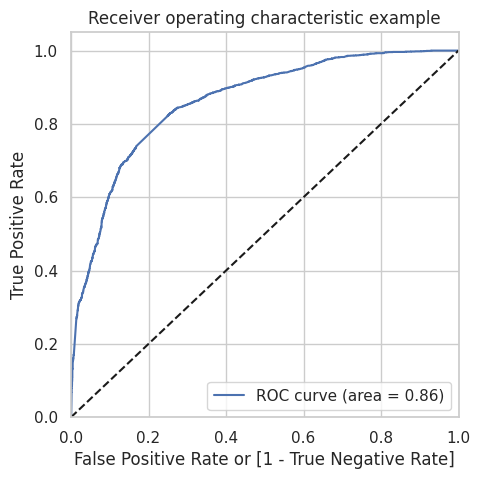

In [565]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

OPTIMAL CUT-OFF POINT

In [566]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  leadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1         0.933070    2549          1    1    1    1    1    1   
1          1         0.899847    6933          1    1    1    1    1    1   
2          1         0.232658     430          0    1    1    1    0    0   
3          0         0.249241    1104          0    1    1    1    0    0   
4          0         0.274217    5717          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    1    1    1    1    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [567]:
#Accuracy sensitivity and specificity calculation
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1 
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.411886  1.000000  0.000000
0.1   0.1  0.565785  0.986239  0.271320
0.2   0.2  0.692202  0.917848  0.534171
0.3   0.3  0.763483  0.851960  0.701519
0.4   0.4  0.792339  0.726856  0.838201
0.5   0.5  0.792511  0.673478  0.875876
0.6   0.6  0.776194  0.592160  0.905082
0.7   0.7  0.748540  0.492494  0.927862
0.8   0.8  0.717279  0.369892  0.960572
0.9   0.9  0.655788  0.175146  0.992407


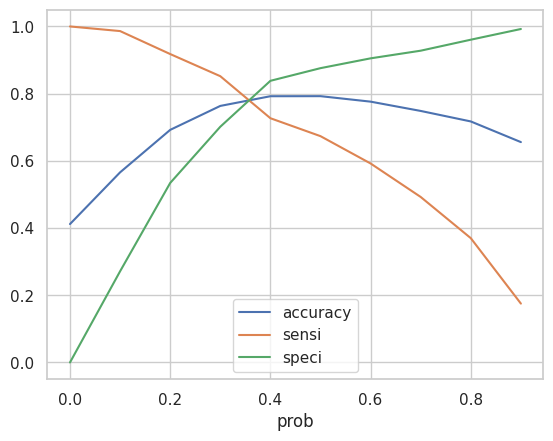

In [568]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [569]:
y_train_pred_final['final_predicted']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  leadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1         0.933070    2549          1    1    1    1    1    1   
1          1         0.899847    6933          1    1    1    1    1    1   
2          1         0.232658     430          0    1    1    1    0    0   
3          0         0.249241    1104          0    1    1    1    0    0   
4          0         0.274217    5717          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    1    1    1    1    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

**STEP 9: MODEL EVALUATION**

In [570]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7634833390587427

In [571]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[2402, 1022],
       [ 355, 2043]])

In [572]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [573]:
#Sensitivity of the final model

TP / float(TP+FN)

0.8519599666388658

PRECISION AND RECALL

In [574]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion

array([[2402, 1022],
       [ 355, 2043]])

In [575]:
#Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.666557911908646

In [576]:
#Recall=TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8519599666388658

In [577]:
#Precision and Recall Tradeoff

y_train_pred_final.Converted,y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 5817    0
 5818    1
 5819    1
 5820    1
 5821    0
 Name: Converted, Length: 5822, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 5817    0
 5818    1
 5819    0
 5820    1
 5821    0
 Name: predicted, Length: 5822, dtype: int64)

In [578]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

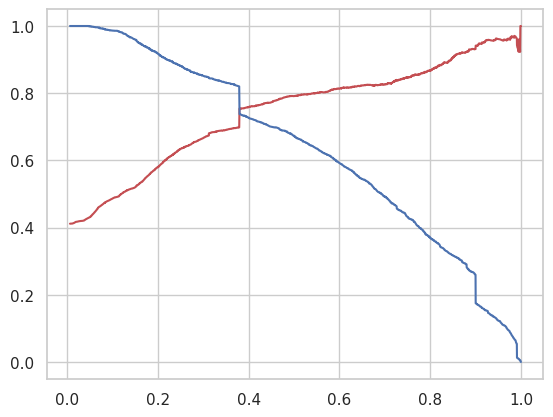

In [579]:
plt.plot(thresholds,p[:-1],"r-")
plt.plot(thresholds,r[:-1],"b-")
plt.show()

MAKING PREDICTIONS BASED ON THE x-TEST DATA SET

In [580]:
num_col.remove('Page_Views')
num_col

['Total_Visits', 'Time_On_Website']

In [581]:
X_test.columns

Index(['Email_Opted', 'Total_Visits', 'Time_On_Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other Web Sites',
       'Country_India', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services E

In [582]:
X_test[num_col]=scaler.fit_transform(X_test[num_col])
X_test.head()

Email_Opted  Total_Visits  Time_On_Website  \
5704            1     -0.508713        -0.889413   
8296            0     -1.148547        -0.960582   
1051            0      0.131120         1.583240   
7232            0     -0.508713        -0.816420   
1343            0     -1.148547        -0.960582   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
5704                                    1                          0   
8296                                    0                          0   
1051                                    0                          0   
7232                                    0                          0   
1343                                    0                          0   

      Lead_Origin_Lead Import  Lead_Origin_Quick Add Form  Lead_Source_Google  \
5704                        0                           0                   0   
8296                        0                           0                   0   
1051                        0                           0                   1   
7232                        0                           0                   0   
1343                        0                           0                   0   

      Lead_Source_Olark Chat  Lead_Source_Organic Search  ...  \
5704                       0                           0  ...   
8296                       1                           0  ...   
1051                       0                           0  ...   
7232                       0                           0  ...   
1343                       1                           0  ...   

      Occupation_Housewife  Occupation_Other  Occupation_Student  \
5704                     0                 0                   0   
8296                     0                 0                   0   
1051                     0                 0                   0   
7232                     0                 0                   0   
1343                     0                 0                   0   

      Occupation_Unemployed  Reason_To_Choose_Flexibility & Convenience  \
5704                      1                                           0   
8296                      1                                           0   
1051                      1                                           0   
7232                      1                                           0   
1343                      1                                           0   

      Reason_To_Choose_Not Provided  Reason_To_Choose_Other  \
5704                              1                       0   
8296                              0                       0   
1051                              0                       0   
7232                              0                       0   
1343                              0                       0   

      City_Non Maharashtra Cities  City_Other Maharashtra Cities  \
5704                            0                              0   
8296                            0                              0   
1051                            0                              0   
7232                            0                              0   
1343                            0                              0   

      Mastering_Interview_Copy_Yes  
5704                             0  
8296                             0  
1051                             0  
7232                             0  
1343                             0  

[5 rows x 39 columns]

In [583]:
X_test_sm=sm.add_constant(X_test[col])

MAKING PREDICTION ON y-TEST DATA SET

In [584]:
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

5704    0.012412
8296    0.381025
1051    0.790754
7232    0.133790
1343    0.381025
6260    0.314079
1809    0.632130
806     0.058559
2766    0.301282
779     0.159350
dtype: float64

In [585]:
y_pred_1=pd.DataFrame(y_test_pred)

In [586]:
y_pred_1.head()

0
5704  0.012412
8296  0.381025
1051  0.790754
7232  0.133790
1343  0.381025

In [587]:
y_test_df=pd.DataFrame(y_test)

In [588]:
y_test_df['leadID']=y_test_df.index

In [589]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [590]:
y_pred_final=pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  leadID         0
0          0    5704  0.012412
1          1    8296  0.381025
2          1    1051  0.790754
3          0    7232  0.133790
4          1    1343  0.381025

In [591]:
#Renaming column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [592]:
#Rearranging the columns
y_pred_final=y_pred_final.reindex(['leadID','Converted','Conversion_Prob'], axis=1)

In [593]:
y_pred_final.head()

leadID  Converted  Conversion_Prob
0    5704          0         0.012412
1    8296          1         0.381025
2    1051          1         0.790754
3    7232          0         0.133790
4    1343          1         0.381025

In [594]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [595]:
y_pred_final.head()

leadID  Converted  Conversion_Prob  final_predicted
0    5704          0         0.012412                0
1    8296          1         0.381025                1
2    1051          1         0.790754                1
3    7232          0         0.133790                0
4    1343          1         0.381025                1

In [596]:
##Overall accuracy calculation:

metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7536057692307693

In [597]:
confusion2=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted )
confusion2

array([[1018,  436],
       [ 179,  863]])

In [598]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [599]:
##Overall sensitivity calculation

TP / float(TP+FN)

0.8282149712092131

In [600]:
##Overall Specificity calculation

TN / float(TN+FP)

0.7001375515818432